In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
data = pd.read_excel("../Dataset.xlsx", sheet_name=['Total Consumers'])
df = data['Total Consumers']
df

0         1         2         3         4         5         6   \
0      2.964  2.322959  1.544607  0.778310  1.962012  2.677445  0.237877   
1      2.584  2.371797  1.544607  0.778310  1.962012  2.733737  0.192929   
2      3.071  2.415961  1.319880  0.665072  1.676555  2.784640  0.382869   
3      2.694  2.302538  1.319880  0.665072  1.676555  2.653908  0.442052   
4      2.569  2.363063  0.913154  0.460128  1.159919  2.723669  0.192242   
...      ...       ...       ...       ...       ...       ...       ...   
35131  1.664  2.244719  1.455982  0.733653  1.849437  2.587266  0.205654   
35132  1.659  2.136340  1.201186  0.605264  1.525786  2.462348  0.201219   
35133  1.664  2.192805  1.201186  0.605264  1.525786  2.527430  0.228585   
35134  1.697  1.446083  0.259545  0.130782  0.329682  1.666757  0.189302   
35135  1.673  1.174827  0.259545  0.130782  0.329682  1.354107  0.208899   

             7         8         9   ...        41        42        43  \
0      0.689194  0.358525  0.814643  ...  0.898895  0.203825  0.221624   
1      0.558967  0.358525  0.660712  ...  0.917793  0.165311  0.179747   
2      1.109272  0.377198  1.311186  ...  0.934883  0.328060  0.356708   
3      1.280743  0.377198  1.513868  ...  0.890992  0.378772  0.411848   
4      0.556976  0.668500  0.658358  ...  0.914413  0.164722  0.179106   
...         ...       ...       ...  ...       ...       ...       ...   
35131  0.595835  0.171793  0.704291  ...  0.868619  0.176214  0.191602   
35132  0.582985  0.067223  0.689101  ...  0.826680  0.172414  0.187470   
35133  0.662271  0.067223  0.782819  ...  0.848530  0.195862  0.212966   
35134  0.548459  0.070958  0.648292  ...  0.559578  0.162203  0.176368   
35135  0.605235  0.070958  0.715402  ...  0.454612  0.178994  0.194625   

             44        45        46        47        48        49        50  
0      0.319531  0.830996  0.924987  0.219128  0.274880  0.990488  0.779475  
1      0.319531  0.848467  0.944434  0.177722  0.222940  1.011313  0.795863  
2      0.336174  0.864266  0.962019  0.352691  0.442426  1.030144  0.810682  
3      0.336174  0.823691  0.916855  0.407209  0.510816  0.981781  0.772623  
4      0.595793  0.845343  0.940956  0.177089  0.222146  1.007588  0.792932  
...         ...       ...       ...       ...       ...       ...       ...  
35131  0.153109  0.803007  0.893832  0.189444  0.237645  0.957128  0.753222  
35132  0.059912  0.764237  0.850676  0.185359  0.232519  0.910916  0.716855  
35133  0.059912  0.784436  0.873160  0.210568  0.264142  0.934992  0.735802  
35134  0.063241  0.517310  0.575820  0.174381  0.218749  0.616596  0.485237  
35135  0.063241  0.420273  0.467808  0.192433  0.241394  0.500935  0.394216  

[35136 rows x 51 columns]

In [42]:
def no_ml_predict(X, y):
    mse = mean_squared_error(X, y)
    mae = mean_absolute_error(X, y)
    r2 = r2_score(X, y)
    print('MSE: %.4f' % mse)
    print('MAE: %.4f' % mae)
    print('R2: %.4f' % r2)
    
def plot_results(preds: np.array, actuals: np.array, title: str):
    
    plt.scatter(actuals, preds, c='b', label='predicted')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.title(title)
    plt.xlim(0, plt.xlim()[1])
    plt.ylim(0, plt.ylim()[1])
    _ = plt.plot([0, 100], [0, 100], '--r', label='y=x')
    plt.legend()
    plt.show()

In [43]:
df_public = df[0]

## Public Building data
### Previous 15 minutes prediction data

In [44]:
X_last15_public = df_public.copy()
m = len(X_last15_public)
X_last15_public = X_last15_public.iloc[0:(m-1)]
X_last15_public

0        2.964
1        2.584
2        3.071
3        2.694
4        2.569
         ...  
35130    1.670
35131    1.664
35132    1.659
35133    1.664
35134    1.697
Name: 0, Length: 35135, dtype: float64

In [45]:
y_last15_public = df_public.copy()
y_last15_public = y_last15_public.iloc[1:].reset_index(drop=True)
y_last15_public

0        2.584
1        3.071
2        2.694
3        2.569
4        3.174
         ...  
35130    1.664
35131    1.659
35132    1.664
35133    1.697
35134    1.673
Name: 0, Length: 35135, dtype: float64

### Previous day at same hour prediction data

In [46]:
X_previous_day_public = df_public.copy()
m = len(X_previous_day_public)
X_previous_day_public = X_previous_day_public.iloc[0:(m-96)]
X_previous_day_public

0        2.964
1        2.584
2        3.071
3        2.694
4        2.569
         ...  
35035    1.664
35036    1.659
35037    1.664
35038    1.697
35039    1.673
Name: 0, Length: 35040, dtype: float64

In [47]:
y_previous_day_public = df_public.copy()
y_previous_day_public = y_previous_day_public.iloc[96:].reset_index(drop=True)
y_previous_day_public

0        3.054
1        2.677
2        3.522
3        2.729
4        2.368
         ...  
35035    1.664
35036    1.659
35037    1.664
35038    1.697
35039    1.673
Name: 0, Length: 35040, dtype: float64

### Previous week same day at same hour prediction data

In [48]:
X_last_week_public = df_public.copy()
m = len(X_last_week_public)
X_last_week_public = X_last_week_public.iloc[0:(m-96*7)]
X_last_week_public

0        2.964
1        2.584
2        3.071
3        2.694
4        2.569
         ...  
34459    1.667
34460    1.678
34461    1.641
34462    1.696
34463    1.645
Name: 0, Length: 34464, dtype: float64

In [49]:
y_last_week_public = df_public.copy()
y_last_week_public = y_last_week_public.iloc[(96*7):].reset_index(drop=True)
y_last_week_public

0        4.940
1        4.149
2        4.401
3        4.431
4        3.988
         ...  
34459    1.664
34460    1.659
34461    1.664
34462    1.697
34463    1.673
Name: 0, Length: 34464, dtype: float64

## All 51 houses
### Previous 15 minutes

In [50]:
X_last15 = df.copy()
y_last15 = df.copy()
for house in X_last15:
    m = len(X_last15[house])
    X_last15[house] = X_last15[house].iloc[0:(m-1)]
    y_last15[house] = y_last15[house].iloc[1:].reset_index(drop=True)
X_last15.drop(X_last15.tail(1).index, axis=0, inplace=True)
y_last15.drop(y_last15.tail(1).index, axis=0, inplace=True)
X_last15

0         1         2         3         4         5         6   \
0      2.964  2.322959  1.544607  0.778310  1.962012  2.677445  0.237877   
1      2.584  2.371797  1.544607  0.778310  1.962012  2.733737  0.192929   
2      3.071  2.415961  1.319880  0.665072  1.676555  2.784640  0.382869   
3      2.694  2.302538  1.319880  0.665072  1.676555  2.653908  0.442052   
4      2.569  2.363063  0.913154  0.460128  1.159919  2.723669  0.192242   
...      ...       ...       ...       ...       ...       ...       ...   
35130  1.670  3.275491  1.455982  0.733653  1.849437  3.775336  0.209509   
35131  1.664  2.244719  1.455982  0.733653  1.849437  2.587266  0.205654   
35132  1.659  2.136340  1.201186  0.605264  1.525786  2.462348  0.201219   
35133  1.664  2.192805  1.201186  0.605264  1.525786  2.527430  0.228585   
35134  1.697  1.446083  0.259545  0.130782  0.329682  1.666757  0.189302   

             7         8         9   ...        41        42        43  \
0      0.689194  0.358525  0.814643  ...  0.898895  0.203825  0.221624   
1      0.558967  0.358525  0.660712  ...  0.917793  0.165311  0.179747   
2      1.109272  0.377198  1.311186  ...  0.934883  0.328060  0.356708   
3      1.280743  0.377198  1.513868  ...  0.890992  0.378772  0.411848   
4      0.556976  0.668500  0.658358  ...  0.914413  0.164722  0.179106   
...         ...       ...       ...  ...       ...       ...       ...   
35130  0.607002  0.171793  0.717491  ...  1.267488  0.179517  0.195193   
35131  0.595835  0.171793  0.704291  ...  0.868619  0.176214  0.191602   
35132  0.582985  0.067223  0.689101  ...  0.826680  0.172414  0.187470   
35133  0.662271  0.067223  0.782819  ...  0.848530  0.195862  0.212966   
35134  0.548459  0.070958  0.648292  ...  0.559578  0.162203  0.176368   

             44        45        46        47        48        49        50  
0      0.319531  0.830996  0.924987  0.219128  0.274880  0.990488  0.779475  
1      0.319531  0.848467  0.944434  0.177722  0.222940  1.011313  0.795863  
2      0.336174  0.864266  0.962019  0.352691  0.442426  1.030144  0.810682  
3      0.336174  0.823691  0.916855  0.407209  0.510816  0.981781  0.772623  
4      0.595793  0.845343  0.940956  0.177089  0.222146  1.007588  0.792932  
...         ...       ...       ...       ...       ...       ...       ...  
35130  0.153109  1.171747  1.304279  0.192995  0.242099  1.396640  1.099100  
35131  0.153109  0.803007  0.893832  0.189444  0.237645  0.957128  0.753222  
35132  0.059912  0.764237  0.850676  0.185359  0.232519  0.910916  0.716855  
35133  0.059912  0.784436  0.873160  0.210568  0.264142  0.934992  0.735802  
35134  0.063241  0.517310  0.575820  0.174381  0.218749  0.616596  0.485237  

[35135 rows x 51 columns]

### Previous day at same hour

In [51]:
X_previous_day = df.copy()
y_previous_day = df.copy()
for house in X_previous_day:
    m = len(X_previous_day[house])
    X_previous_day[house] = X_previous_day[house].iloc[0:(m-96)]
    y_previous_day[house] = y_previous_day[house].iloc[96:].reset_index(drop=True)
X_previous_day.drop(X_previous_day.tail(96).index, axis=0, inplace=True)
y_previous_day.drop(y_previous_day.tail(96).index, axis=0, inplace=True)
X_previous_day

0         1         2         3         4         5         6   \
0      2.964  2.322959  1.544607  0.778310  1.962012  2.677445  0.237877   
1      2.584  2.371797  1.544607  0.778310  1.962012  2.733737  0.192929   
2      3.071  2.415961  1.319880  0.665072  1.676555  2.784640  0.382869   
3      2.694  2.302538  1.319880  0.665072  1.676555  2.653908  0.442052   
4      2.569  2.363063  0.913154  0.460128  1.159919  2.723669  0.192242   
...      ...       ...       ...       ...       ...       ...       ...   
35035  1.664  1.913061  1.941837  0.978470  2.466587  2.204997  0.733176   
35036  1.659  2.243612  1.205933  0.607656  1.531817  2.585990  0.760928   
35037  1.664  2.787723  1.205933  0.607656  1.531817  3.213133  0.762274   
35038  1.697  2.133141  0.121859  0.061404  0.154790  2.458661  0.807801   
35039  1.673  3.211768  0.121859  0.061404  0.154790  3.701888  0.770480   

             7         8         9   ...        41        42        43  \
0      0.689194  0.358525  0.814643  ...  0.898895  0.203825  0.221624   
1      0.558967  0.358525  0.660712  ...  0.917793  0.165311  0.179747   
2      1.109272  0.377198  1.311186  ...  0.934883  0.328060  0.356708   
3      1.280743  0.377198  1.513868  ...  0.890992  0.378772  0.411848   
4      0.556976  0.668500  0.658358  ...  0.914413  0.164722  0.179106   
...         ...       ...       ...  ...       ...       ...       ...   
35035  2.124205  0.089631  2.510860  ...  0.740280  0.628221  0.683079   
35036  2.204611  0.145651  2.605901  ...  0.868190  0.652000  0.708935   
35037  2.208509  0.145651  2.610509  ...  1.078740  0.653153  0.710189   
35038  2.340412  0.052285  2.766422  ...  0.825443  0.692163  0.752605   
35039  2.232284  0.052285  2.638612  ...  1.242829  0.660184  0.717834   

             44        45        46        47        48        49        50  
0      0.319531  0.830996  0.924987  0.219128  0.274880  0.990488  0.779475  
1      0.319531  0.848467  0.944434  0.177722  0.222940  1.011313  0.795863  
2      0.336174  0.864266  0.962019  0.352691  0.442426  1.030144  0.810682  
3      0.336174  0.823691  0.916855  0.407209  0.510816  0.981781  0.772623  
4      0.595793  0.845343  0.940956  0.177089  0.222146  1.007588  0.792932  
...         ...       ...       ...       ...       ...       ...       ...  
35035  0.079883  0.684363  0.761768  0.675386  0.847225  0.815712  0.641933  
35036  0.129810  0.802611  0.893391  0.700951  0.879294  0.956656  0.752850  
35037  0.129810  0.997257  1.110052  0.702191  0.880849  1.188660  0.935428  
35038  0.046598  0.763092  0.849402  0.744129  0.933458  0.909552  0.715781  
35039  0.046598  1.148951  1.278904  0.709750  0.890331  1.369468  1.077717  

[35040 rows x 51 columns]

### Previous week same day and same hour

In [52]:
X_previous_week = df.copy()
y_previous_week = df.copy()
for house in X_previous_week:
    m = len(X_previous_week[house])
    X_previous_week[house] = X_previous_week[house].iloc[0:(m-(96*7))]
    y_previous_week[house] = y_previous_week[house].iloc[(96*7):].reset_index(drop=True)
X_previous_week.drop(X_previous_week.tail(96*7).index, axis=0, inplace=True)
y_previous_week.drop(y_previous_week.tail(96*7).index, axis=0, inplace=True)
X_previous_week

0         1         2         3         4         5         6   \
0      2.964  2.322959  1.544607  0.778310  1.962012  2.677445  0.237877   
1      2.584  2.371797  1.544607  0.778310  1.962012  2.733737  0.192929   
2      3.071  2.415961  1.319880  0.665072  1.676555  2.784640  0.382869   
3      2.694  2.302538  1.319880  0.665072  1.676555  2.653908  0.442052   
4      2.569  2.363063  0.913154  0.460128  1.159919  2.723669  0.192242   
...      ...       ...       ...       ...       ...       ...       ...   
34459  1.667  5.137623  3.348760  1.687401  4.253706  5.921631  0.509480   
34460  1.678  4.419318  2.497326  1.258374  3.172187  5.093711  0.317416   
34461  1.641  5.280940  2.497326  1.258374  3.172187  6.086817  0.220130   
34462  1.696  7.556660  0.134520  0.067783  0.170872  8.709815  0.216382   
34463  1.645  6.125462  0.134520  0.067783  0.170872  7.060215  0.170667   

             7         8         9   ...        41        42        43  \
0      0.689194  0.358525  0.814643  ...  0.898895  0.203825  0.221624   
1      0.558967  0.358525  0.660712  ...  0.917793  0.165311  0.179747   
2      1.109272  0.377198  1.311186  ...  0.934883  0.328060  0.356708   
3      1.280743  0.377198  1.513868  ...  0.890992  0.378772  0.411848   
4      0.556976  0.668500  0.658358  ...  0.914413  0.164722  0.179106   
...         ...       ...       ...  ...       ...       ...       ...   
34459  1.476098  0.052285  1.744782  ...  1.988060  0.436547  0.474668   
34460  0.919637  0.567665  1.087032  ...  1.710104  0.271977  0.295727   
34461  0.637775  0.567665  0.753865  ...  2.043518  0.188618  0.205089   
34462  0.626916  0.119508  0.741029  ...  2.924133  0.185407  0.201597   
34463  0.494468  0.119508  0.584473  ...  2.370315  0.146236  0.159006   

             44        45        46        47        48        49        50  
0      0.319531  0.830996  0.924987  0.219128  0.274880  0.990488  0.779475  
1      0.319531  0.848467  0.944434  0.177722  0.222940  1.011313  0.795863  
2      0.336174  0.864266  0.962019  0.352691  0.442426  1.030144  0.810682  
3      0.336174  0.823691  0.916855  0.407209  0.510816  0.981781  0.772623  
4      0.595793  0.845343  0.940956  0.177089  0.222146  1.007588  0.792932  
...         ...       ...       ...       ...       ...       ...       ...  
34459  0.046598  1.837891  2.045767  0.469322  0.588732  2.190635  1.723943  
34460  0.505925  1.580930  1.759743  0.292397  0.366791  1.884357  1.482914  
34461  0.505925  1.889160  2.102834  0.202779  0.254372  2.251744  1.772033  
34462  0.106510  2.703257  3.009011  0.199327  0.250041  3.222090  2.535657  
34463  0.106510  2.191272  2.439118  0.157215  0.197215  2.611841  2.055415  

[34464 rows x 51 columns]

## Prediction all houses
### Previous 15 minutes

	House 0
MSE: 0.2680
MAE: 0.3025
R2: 0.9793


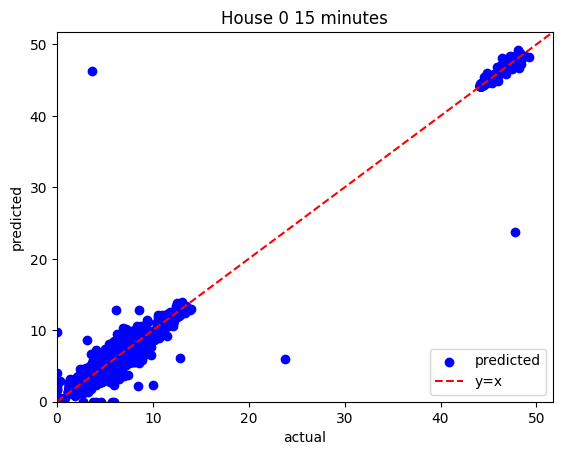


	House 1
MSE: 0.2942
MAE: 0.2964
R2: 0.7132


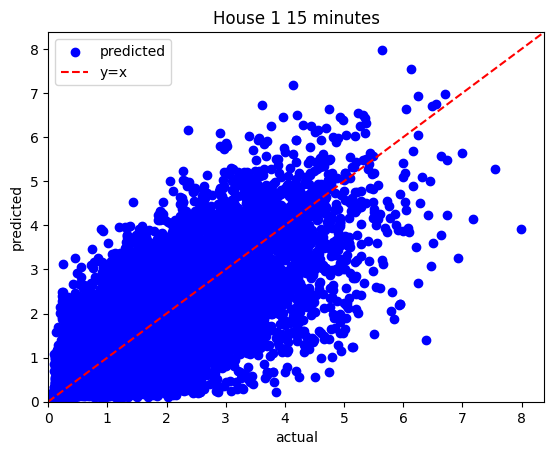


	House 2
MSE: 0.1993
MAE: 0.1467
R2: 0.8126


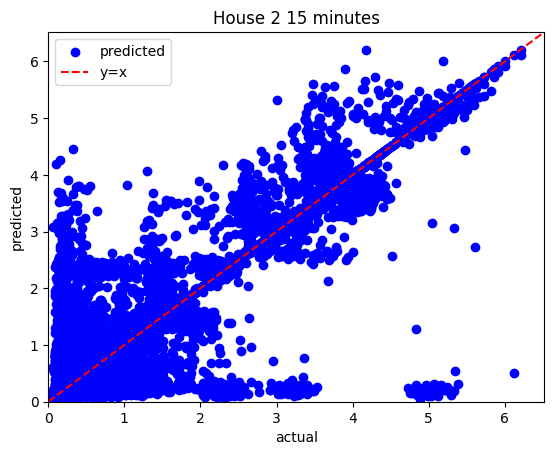


	House 3
MSE: 0.0506
MAE: 0.0739
R2: 0.8126


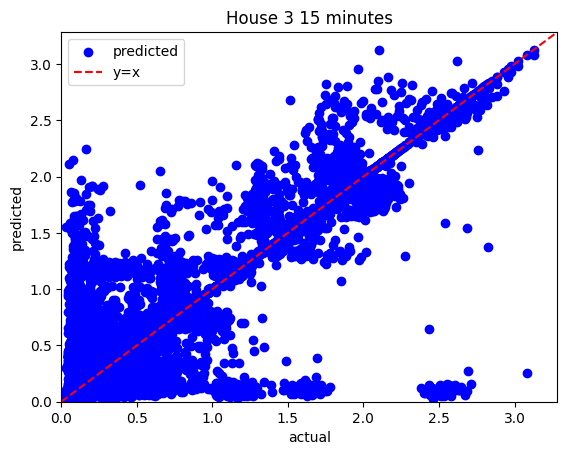


	House 4
MSE: 0.3216
MAE: 0.1863
R2: 0.8126


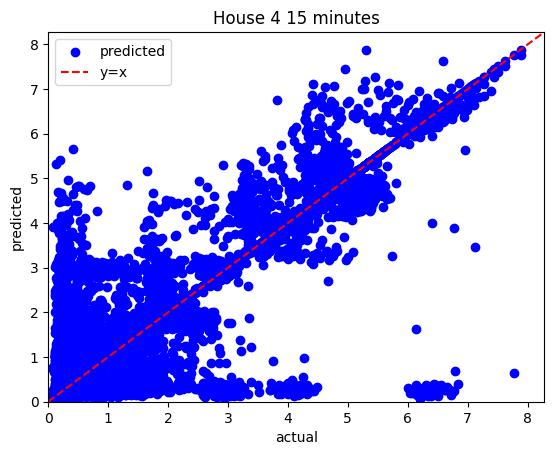


	House 5
MSE: 0.3908
MAE: 0.3416
R2: 0.7132


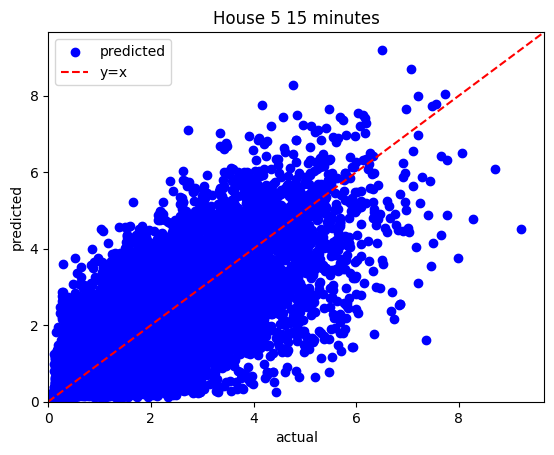


	House 6
MSE: 0.0772
MAE: 0.1645
R2: 0.5361


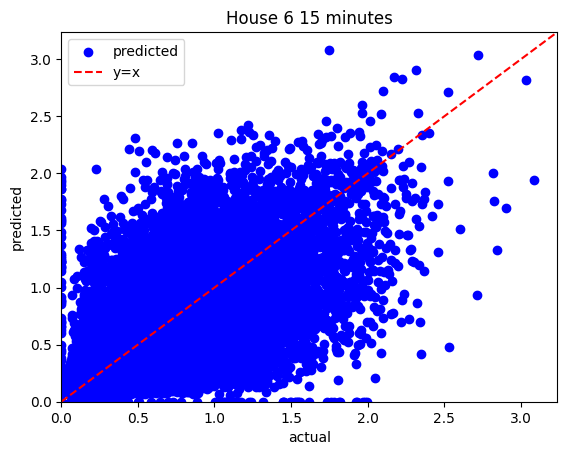


	House 7
MSE: 0.6481
MAE: 0.4766
R2: 0.5361


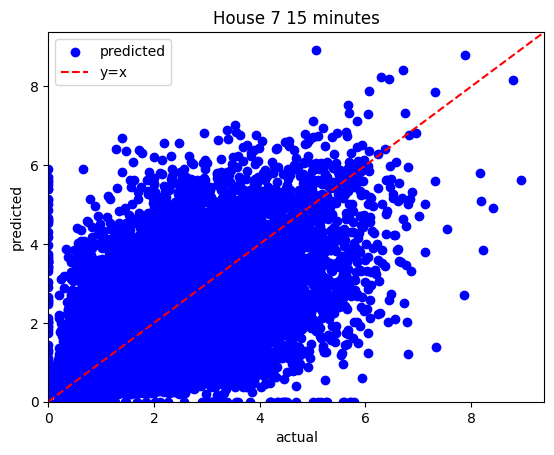


	House 8
MSE: 0.0215
MAE: 0.0621
R2: 0.4025


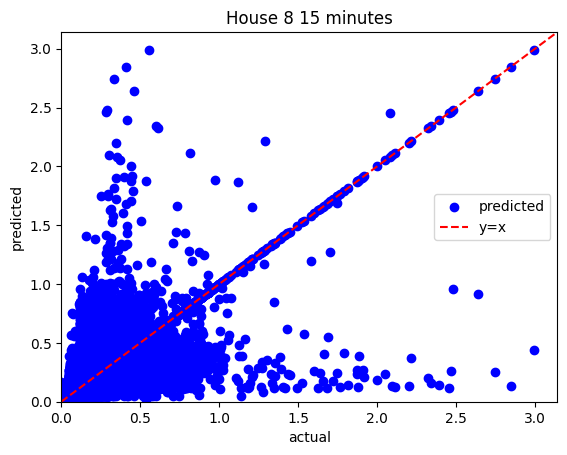


	House 9
MSE: 0.9055
MAE: 0.5634
R2: 0.5361


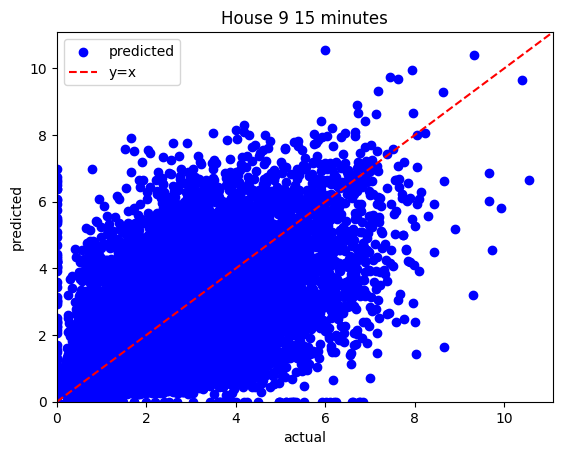


	House 10
MSE: 0.0738
MAE: 0.1609
R2: 0.5361


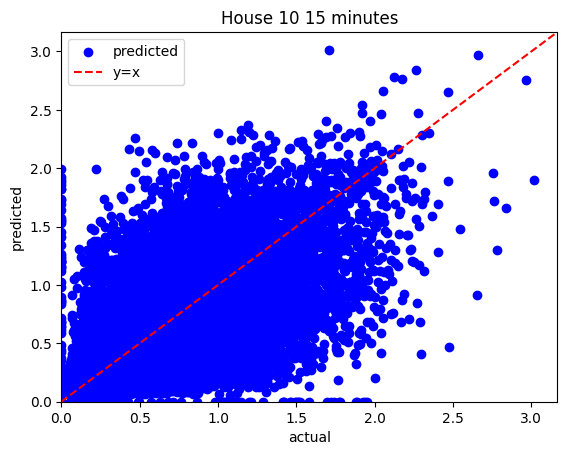


	House 11
MSE: 0.8902
MAE: 0.5586
R2: 0.5361


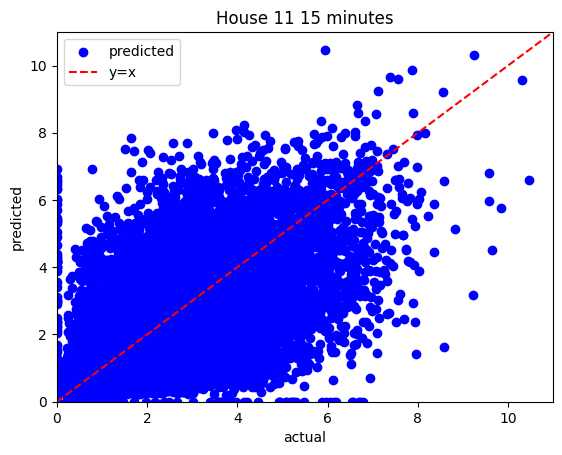


	House 12
MSE: 0.6028
MAE: 0.2551
R2: 0.8126


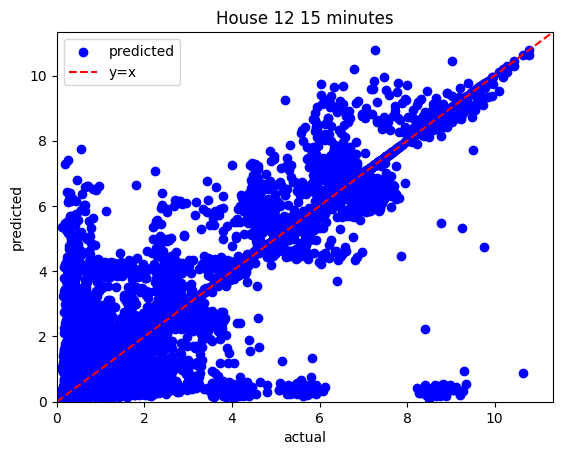


	House 13
MSE: 0.1796
MAE: 0.1795
R2: 0.4025


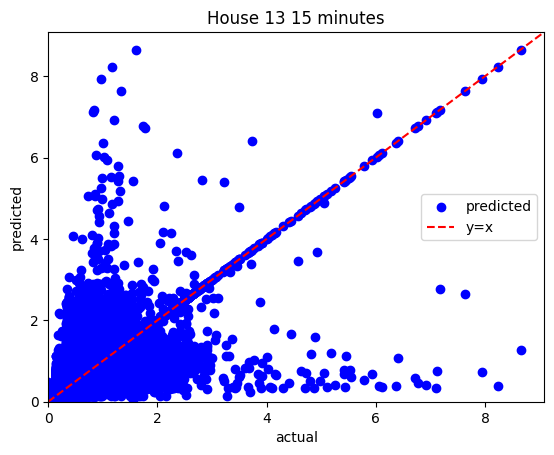


	House 14
MSE: 0.1615
MAE: 0.1320
R2: 0.8126


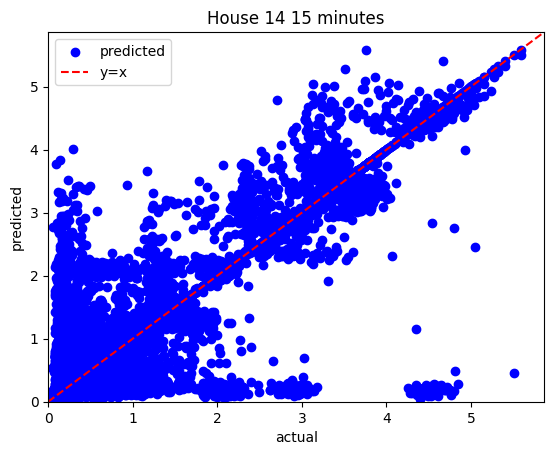


	House 15
MSE: 0.2389
MAE: 0.2670
R2: 0.7132


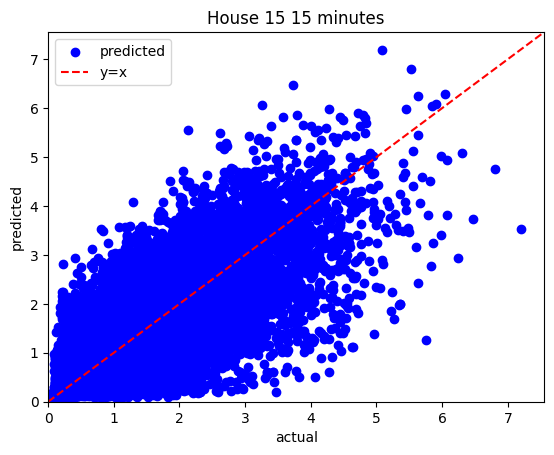


	House 16
MSE: 0.0890
MAE: 0.1766
R2: 0.5361


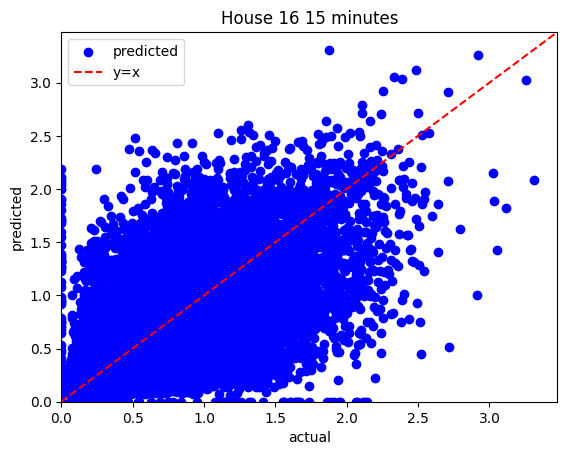


	House 17
MSE: 0.0959
MAE: 0.1311
R2: 0.4025


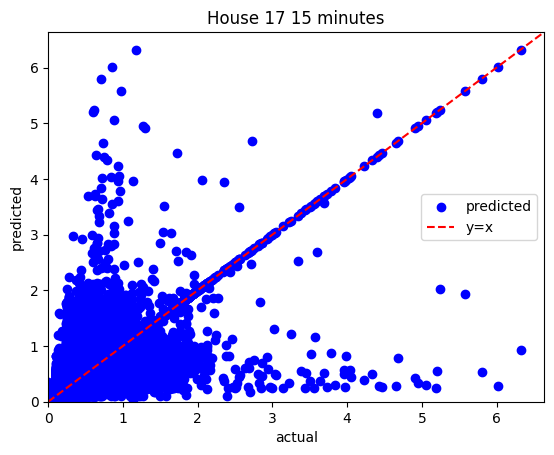


	House 18
MSE: 0.1741
MAE: 0.2280
R2: 0.7132


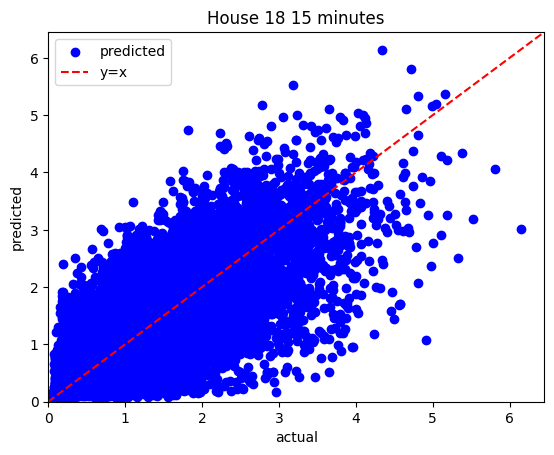


	House 19
MSE: 0.1041
MAE: 0.1367
R2: 0.4025


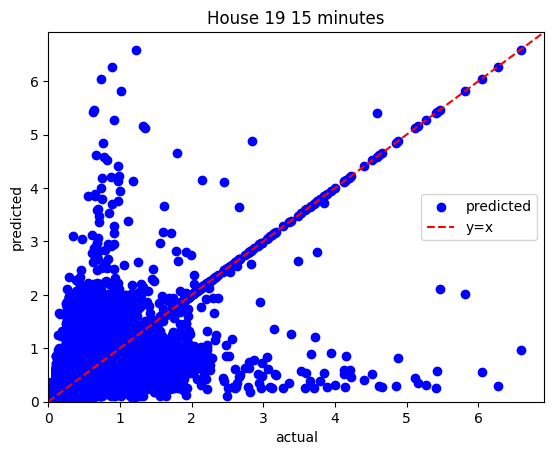


	House 20
MSE: 0.0752
MAE: 0.1624
R2: 0.5361


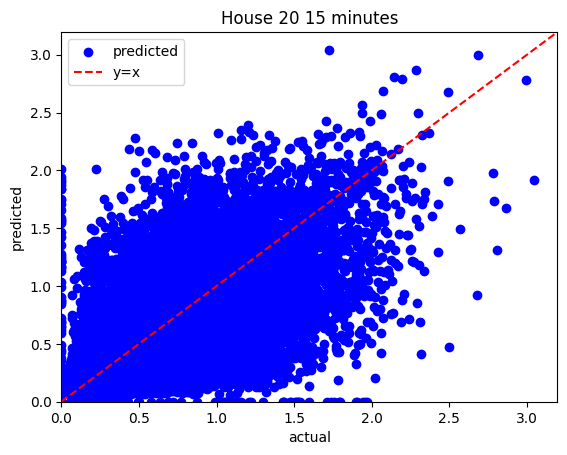


	House 21
MSE: 0.2736
MAE: 0.2216
R2: 0.4025


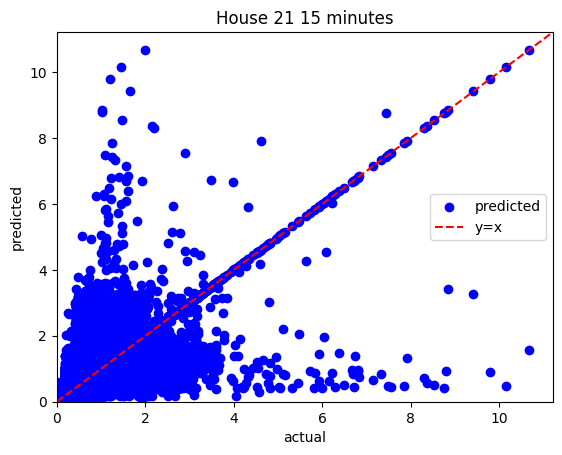


	House 22
MSE: 0.0648
MAE: 0.1507
R2: 0.5361


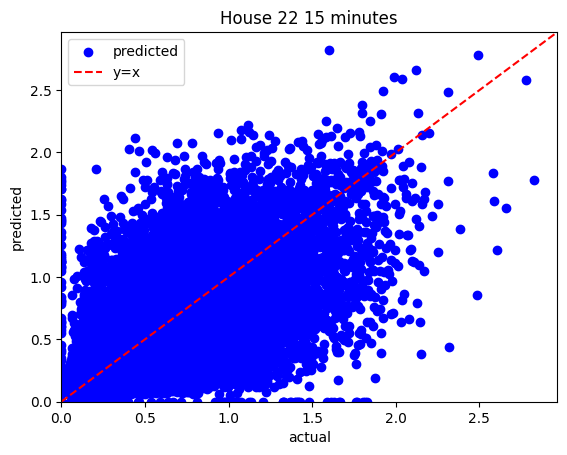


	House 23
MSE: 0.4305
MAE: 0.3585
R2: 0.7132


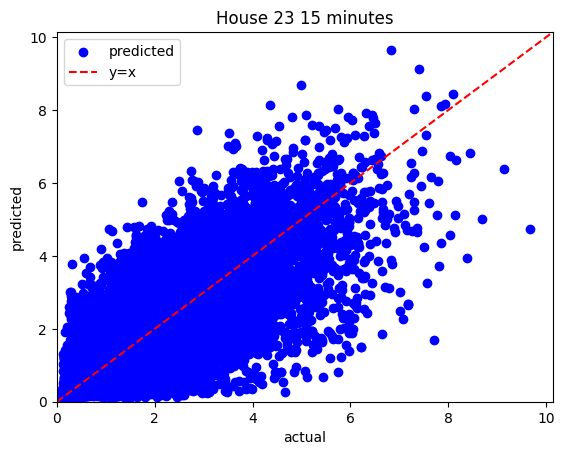


	House 24
MSE: 0.2413
MAE: 0.2081
R2: 0.4025


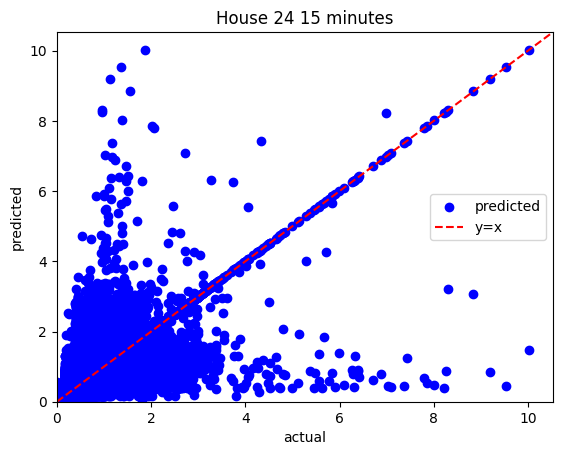


	House 25
MSE: 0.1689
MAE: 0.2245
R2: 0.7132


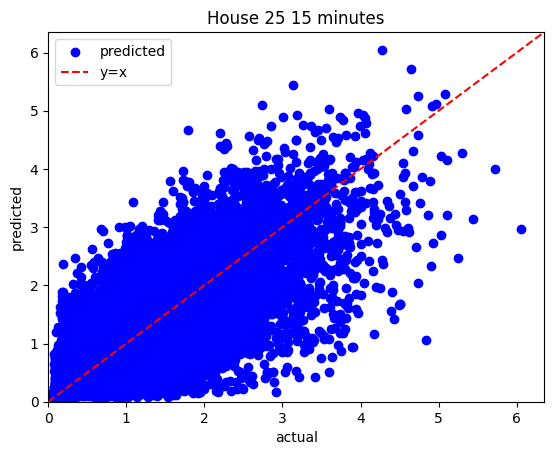


	House 26
MSE: 0.2236
MAE: 0.2584
R2: 0.7132


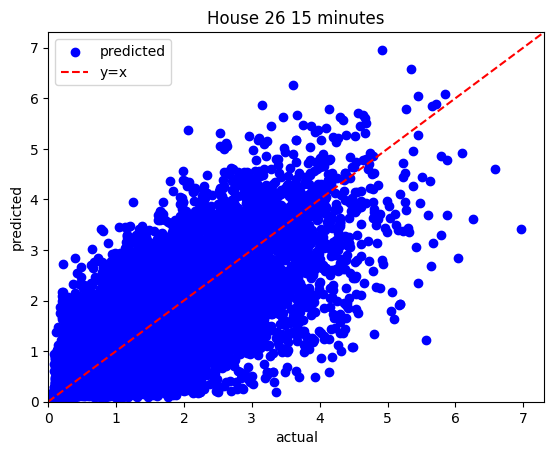


	House 27
MSE: 0.0679
MAE: 0.1103
R2: 0.4025


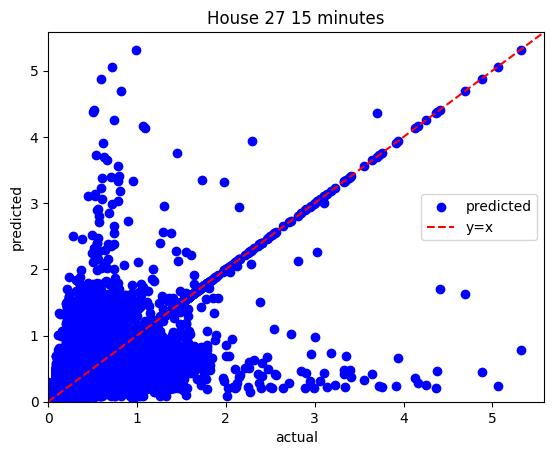


	House 28
MSE: 0.2607
MAE: 0.3023
R2: 0.5361


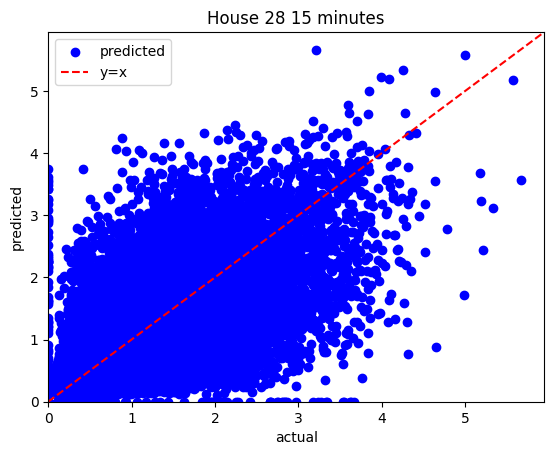


	House 29
MSE: 0.3751
MAE: 0.3626
R2: 0.5361


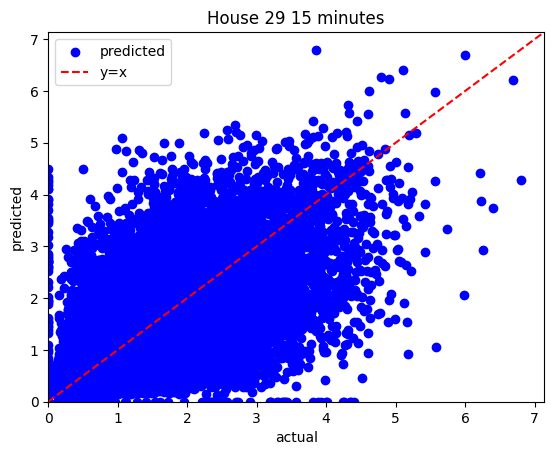


	House 30
MSE: 0.5342
MAE: 0.3994
R2: 0.7132


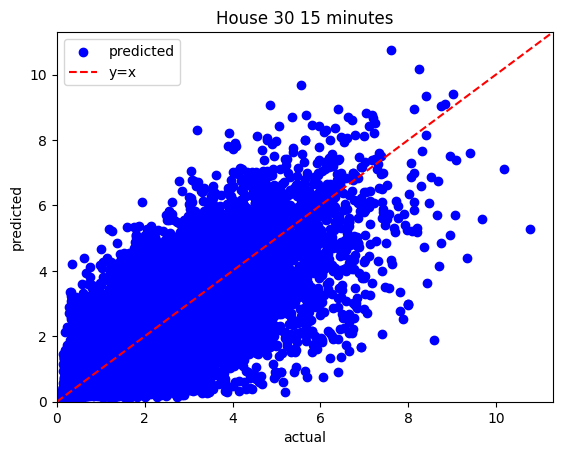


	House 31
MSE: 0.0221
MAE: 0.0629
R2: 0.4025


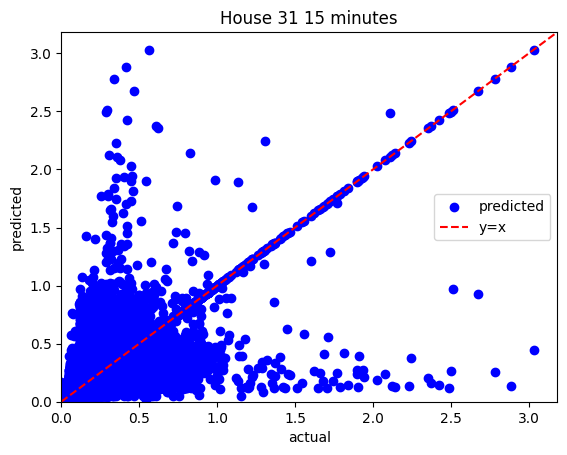


	House 32
MSE: 0.6021
MAE: 0.4594
R2: 0.5361


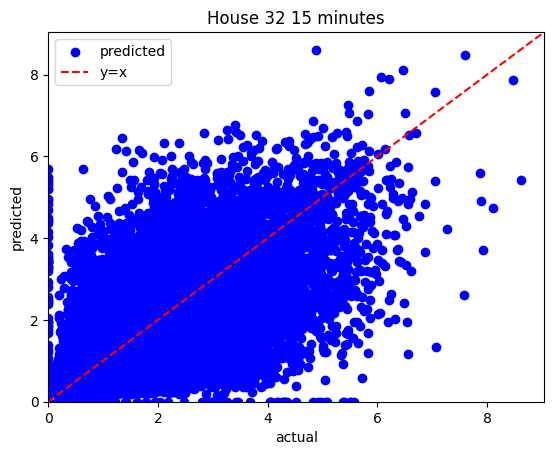


	House 33
MSE: 0.3565
MAE: 0.3262
R2: 0.7132


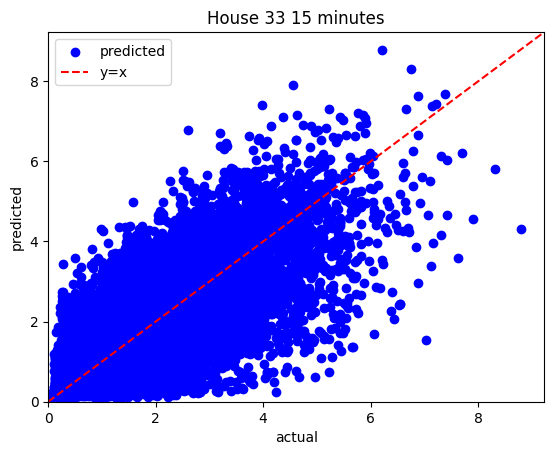


	House 34
MSE: 0.1744
MAE: 0.2282
R2: 0.7132


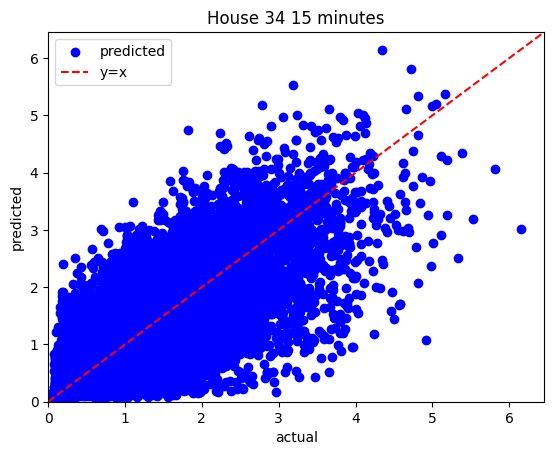


	House 35
MSE: 0.1092
MAE: 0.1400
R2: 0.4025


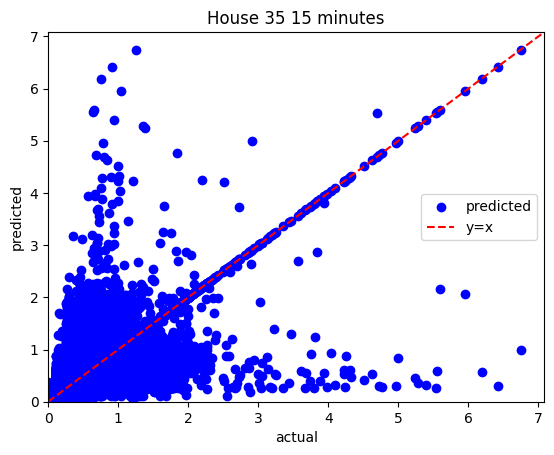


	House 36
MSE: 0.2535
MAE: 0.2132
R2: 0.4025


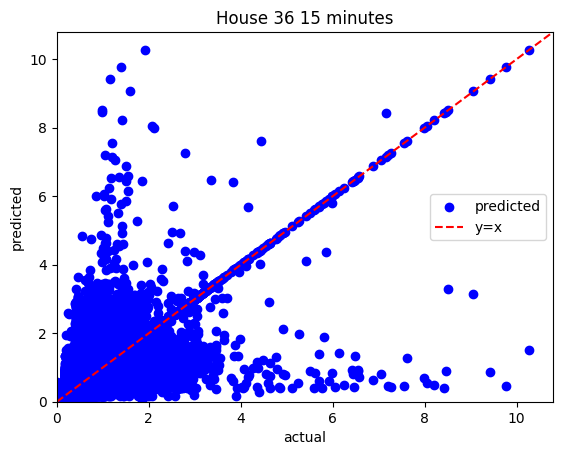


	House 37
MSE: 0.3824
MAE: 0.3379
R2: 0.7132


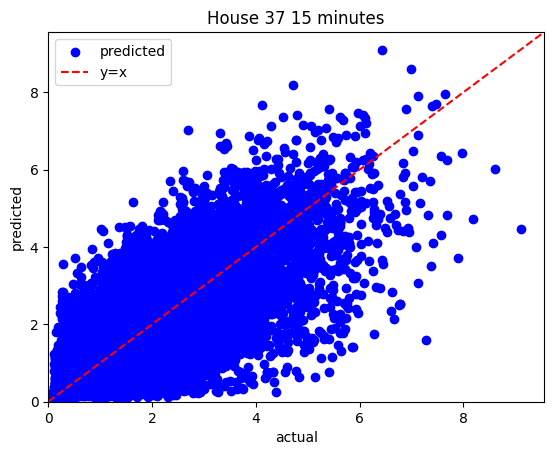


	House 38
MSE: 0.1875
MAE: 0.1834
R2: 0.4025


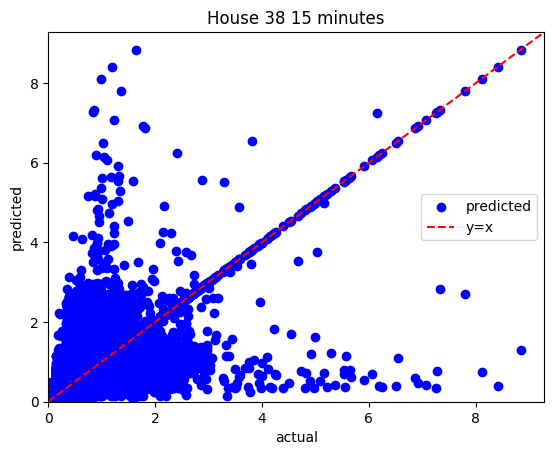


	House 39
MSE: 0.1745
MAE: 0.1769
R2: 0.4025


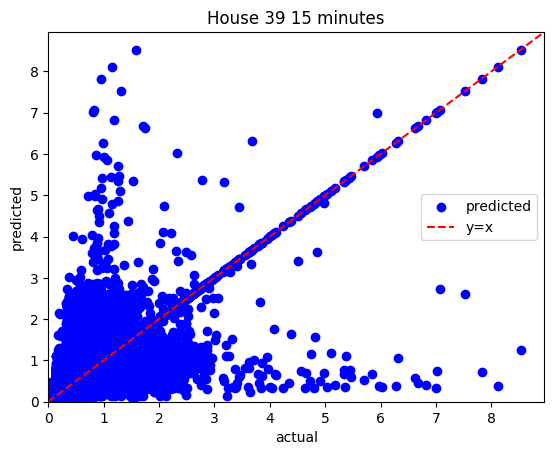


	House 40
MSE: 0.0947
MAE: 0.1822
R2: 0.5361


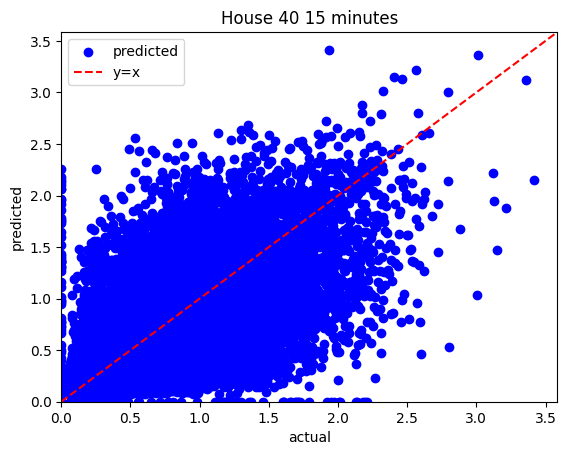


	House 41
MSE: 0.0440
MAE: 0.1147
R2: 0.7132


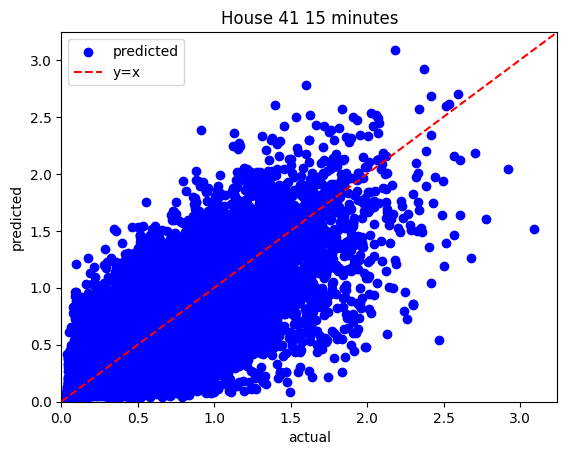


	House 42
MSE: 0.0567
MAE: 0.1410
R2: 0.5361


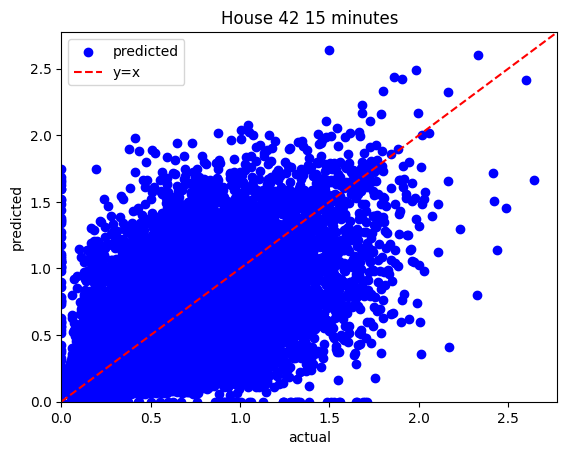


	House 43
MSE: 0.0670
MAE: 0.1533
R2: 0.5361


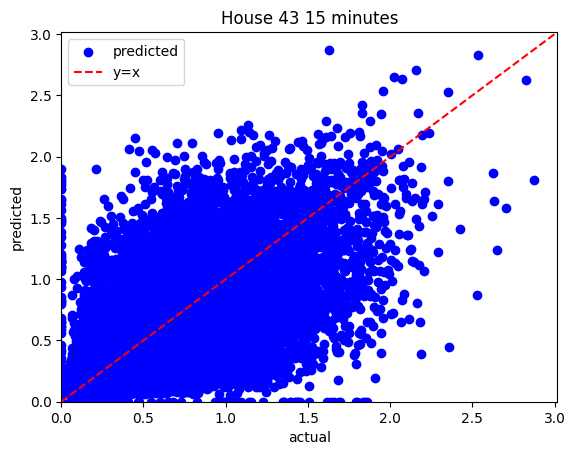


	House 44
MSE: 0.0171
MAE: 0.0553
R2: 0.4025


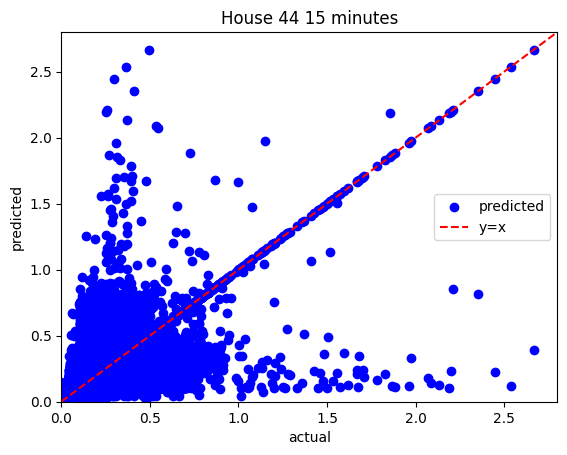


	House 45
MSE: 0.0376
MAE: 0.1060
R2: 0.7132


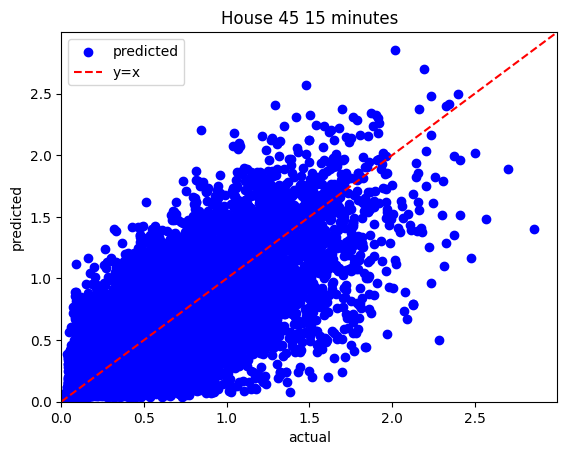


	House 46
MSE: 0.0466
MAE: 0.1180
R2: 0.7132


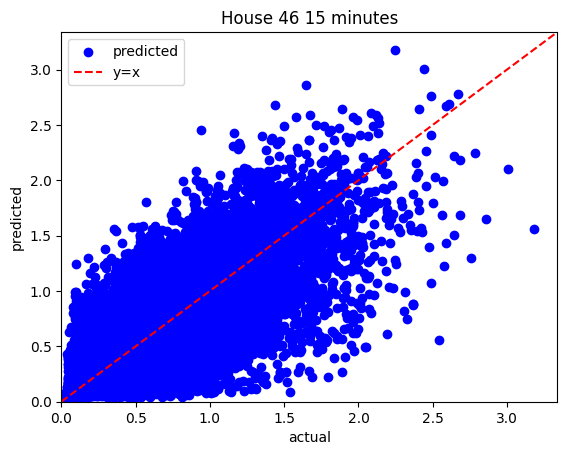


	House 47
MSE: 0.0655
MAE: 0.1515
R2: 0.5361


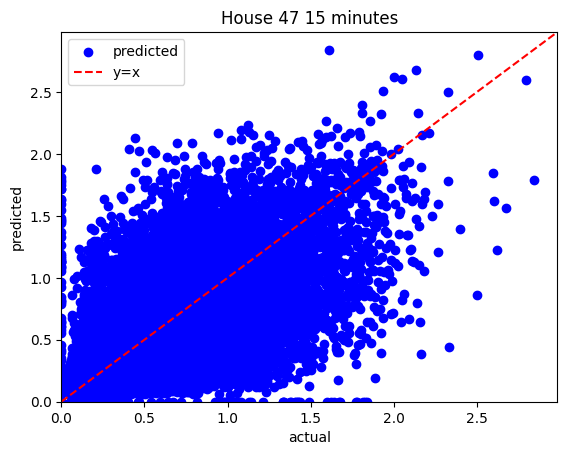


	House 48
MSE: 0.1031
MAE: 0.1901
R2: 0.5361


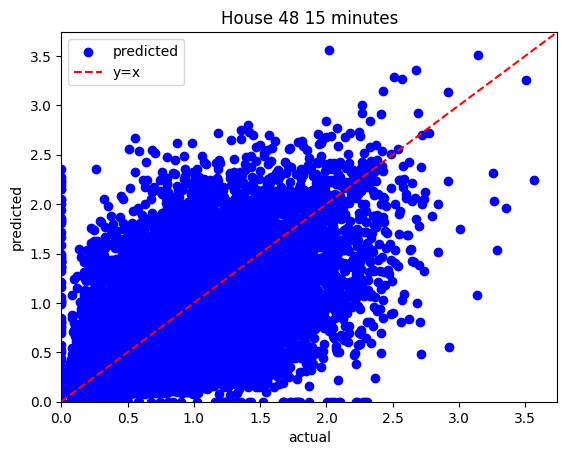


	House 49
MSE: 0.0535
MAE: 0.1264
R2: 0.7132


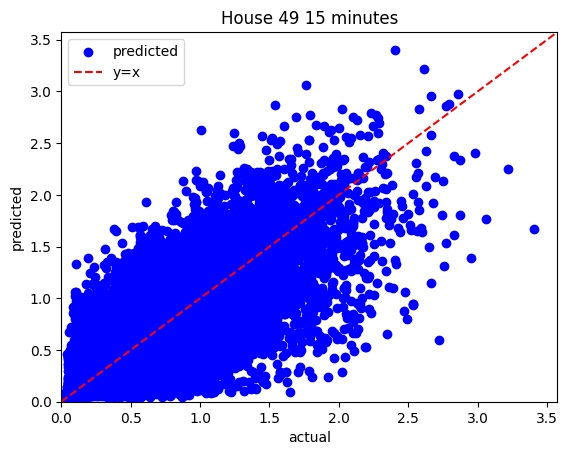


	House 50
MSE: 0.0331
MAE: 0.0994
R2: 0.7132


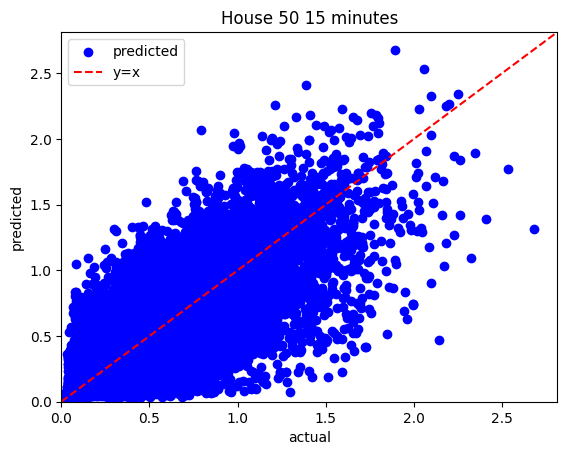

In [59]:
for house in X_last15:
    print("\tHouse {}".format(house))
    no_ml_predict(X_last15[house], y_last15[house])
    plot_results(X_last15[house], y_last15[house], "House {} 15 minutes".format(house))
    print()

### Previous day at same hour

	House 0
MSE: 11.6402
MAE: 0.9341
R2: 0.1004


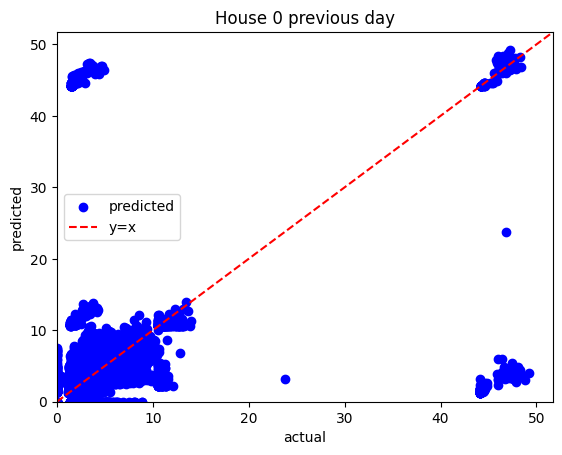


	House 1
MSE: 1.2698
MAE: 0.7451
R2: -0.2396


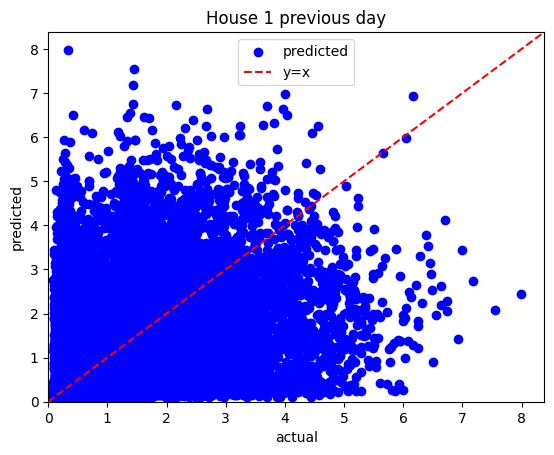


	House 2
MSE: 0.2721
MAE: 0.2606
R2: 0.7444


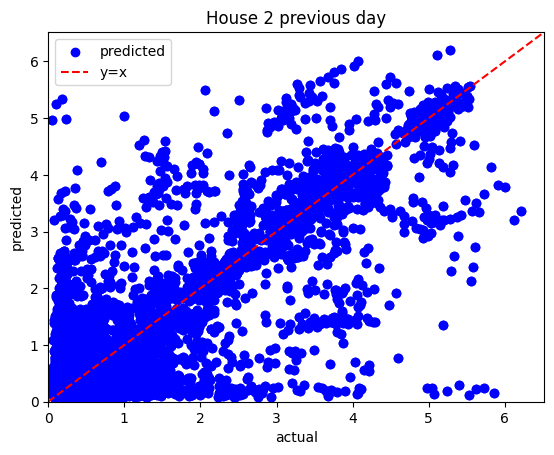


	House 3
MSE: 0.0691
MAE: 0.1313
R2: 0.7444


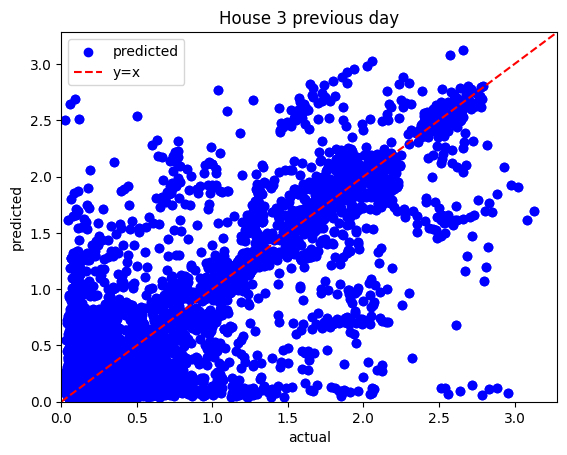


	House 4
MSE: 0.4390
MAE: 0.3310
R2: 0.7444


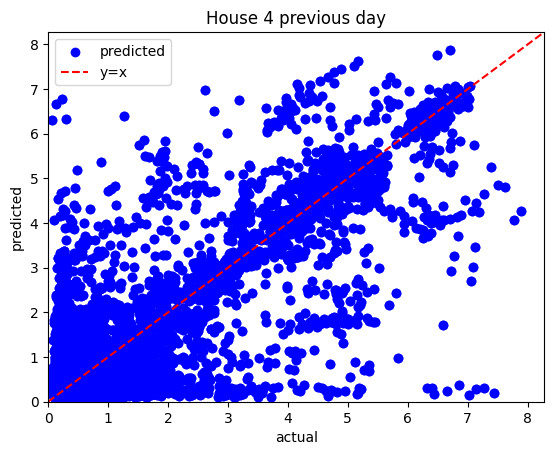


	House 5
MSE: 1.6869
MAE: 0.8588
R2: -0.2396


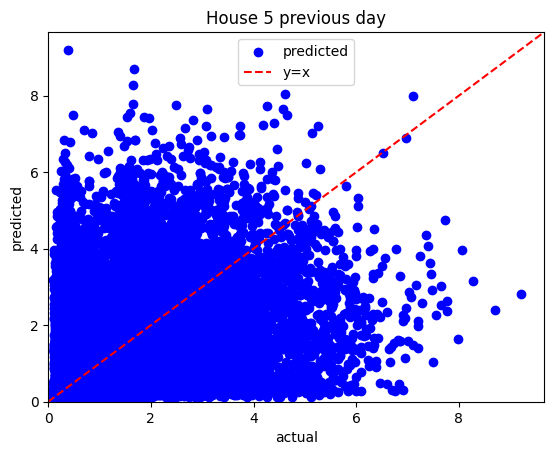


	House 6
MSE: 0.1939
MAE: 0.2918
R2: -0.1685


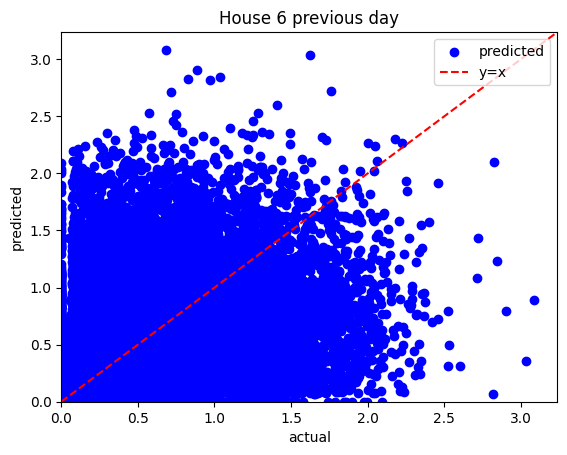


	House 7
MSE: 1.6273
MAE: 0.8454
R2: -0.1685


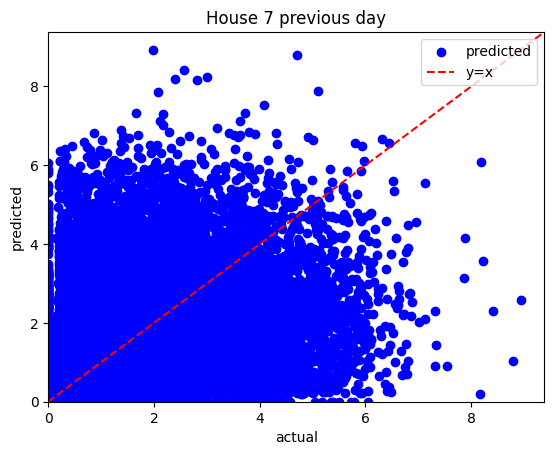


	House 8
MSE: 0.0460
MAE: 0.1214
R2: -0.2772


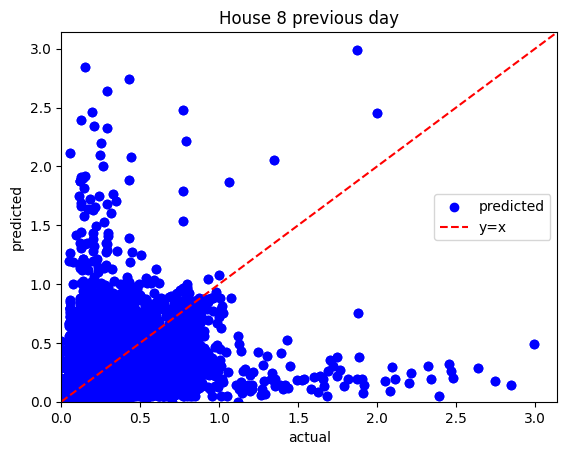


	House 9
MSE: 2.2737
MAE: 0.9993
R2: -0.1685


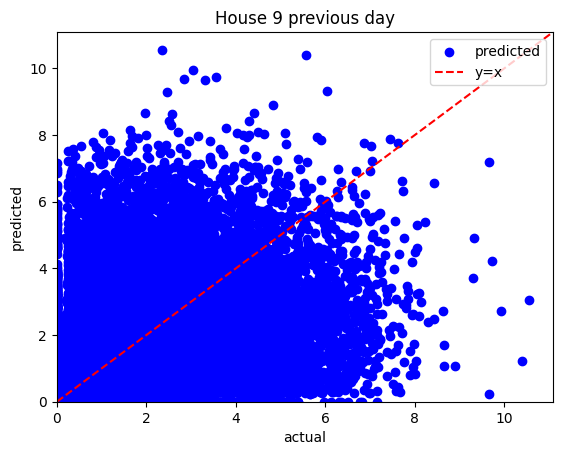


	House 10
MSE: 0.1854
MAE: 0.2853
R2: -0.1685


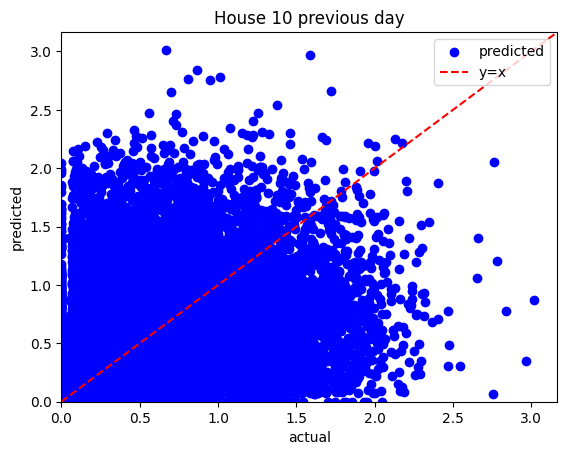


	House 11
MSE: 2.2352
MAE: 0.9908
R2: -0.1685


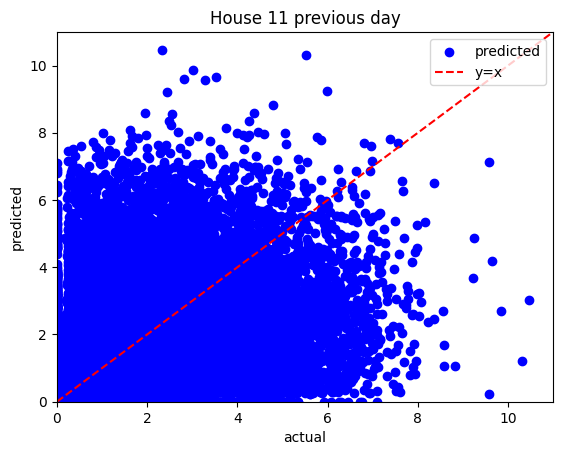


	House 12
MSE: 0.8230
MAE: 0.4531
R2: 0.7444


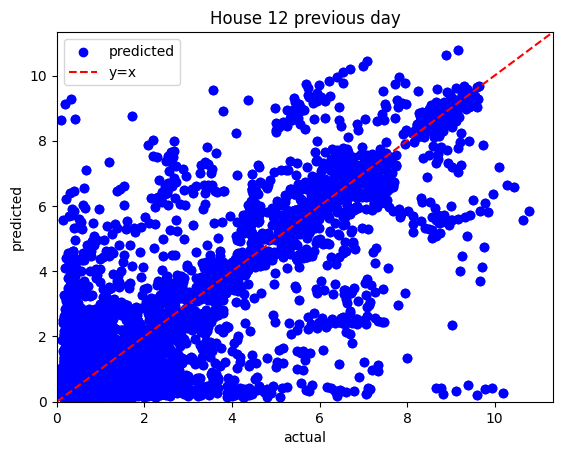


	House 13
MSE: 0.3843
MAE: 0.3510
R2: -0.2772


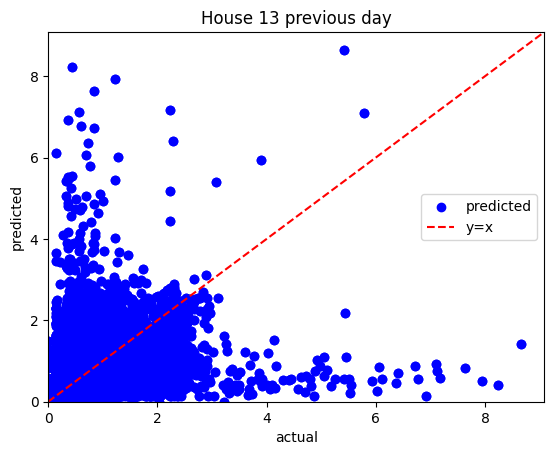


	House 14
MSE: 0.2205
MAE: 0.2346
R2: 0.7444


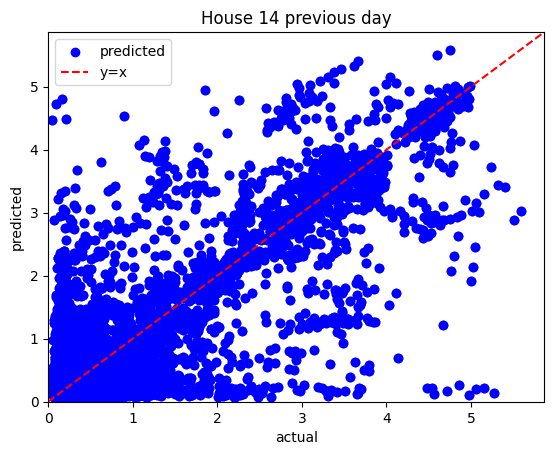


	House 15
MSE: 1.0310
MAE: 0.6714
R2: -0.2396


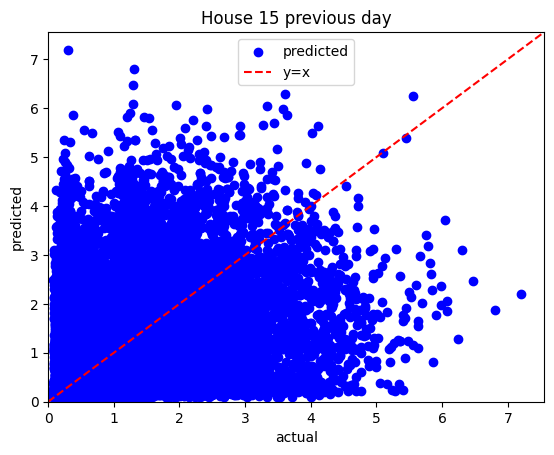


	House 16
MSE: 0.2234
MAE: 0.3132
R2: -0.1685


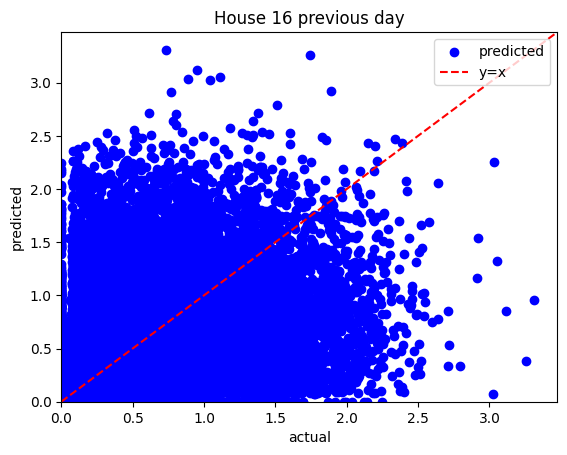


	House 17
MSE: 0.2051
MAE: 0.2564
R2: -0.2772


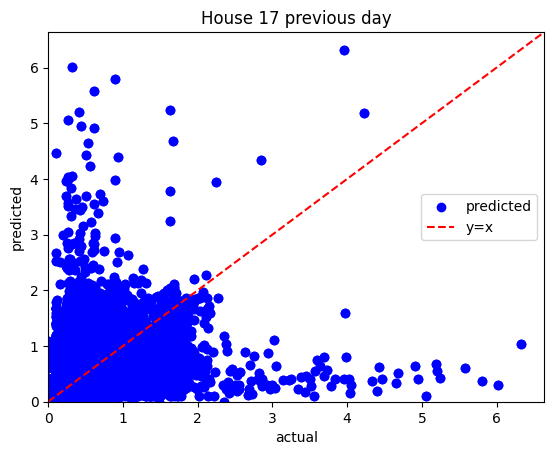


	House 18
MSE: 0.7517
MAE: 0.5733
R2: -0.2396


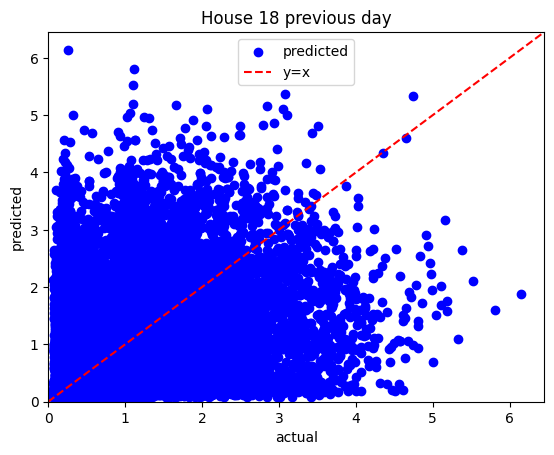


	House 19
MSE: 0.2228
MAE: 0.2673
R2: -0.2772


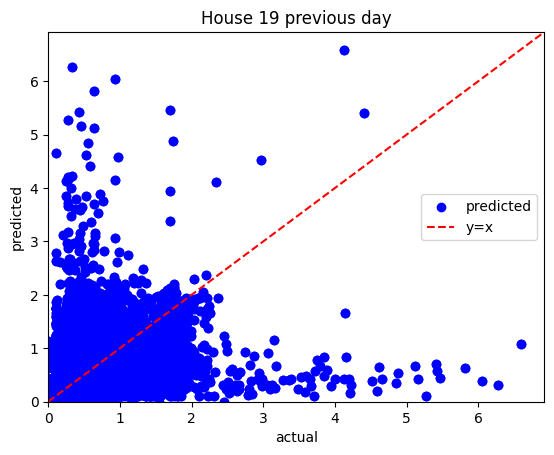


	House 20
MSE: 0.1888
MAE: 0.2879
R2: -0.1685


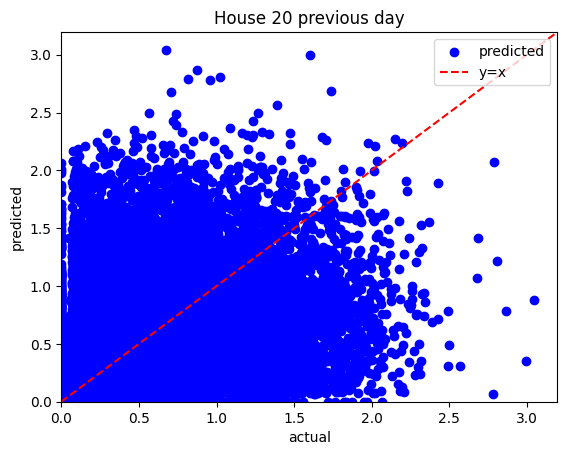


	House 21
MSE: 0.5854
MAE: 0.4332
R2: -0.2772


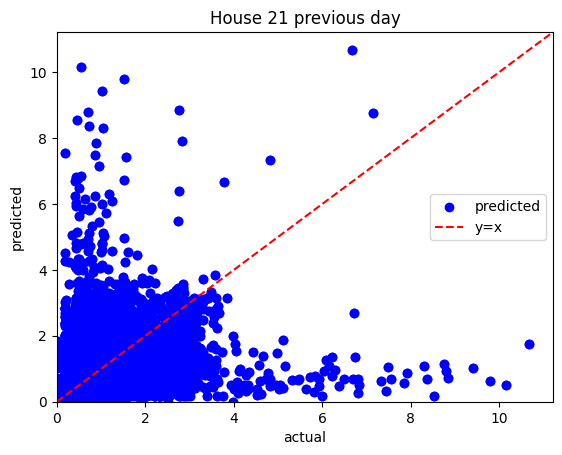


	House 22
MSE: 0.1627
MAE: 0.2673
R2: -0.1685


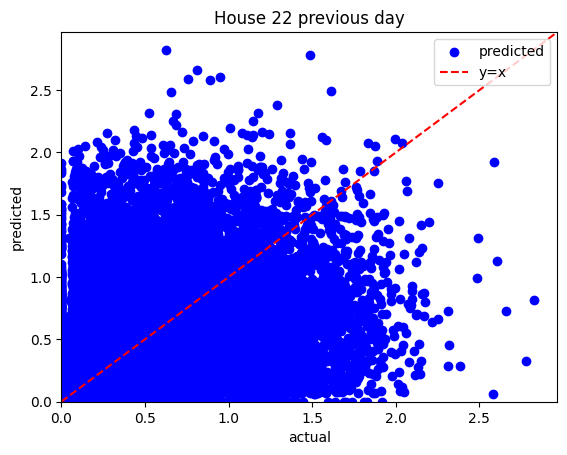


	House 23
MSE: 1.8582
MAE: 0.9013
R2: -0.2396


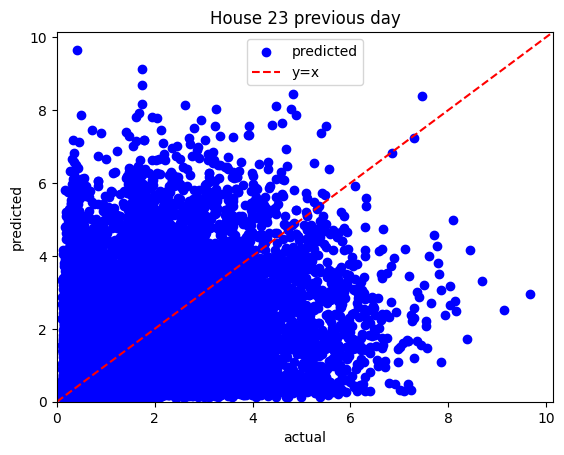


	House 24
MSE: 0.5163
MAE: 0.4069
R2: -0.2772


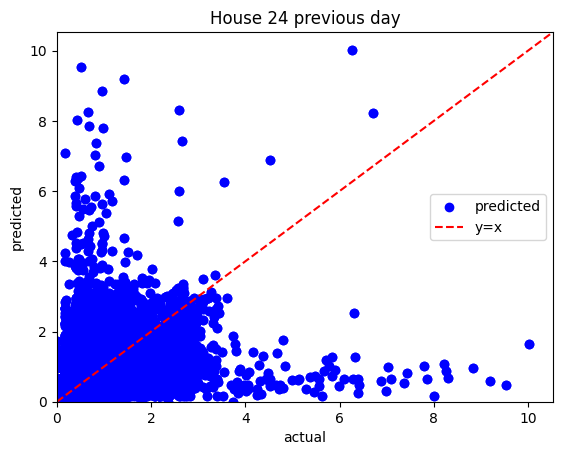


	House 25
MSE: 0.7289
MAE: 0.5645
R2: -0.2396


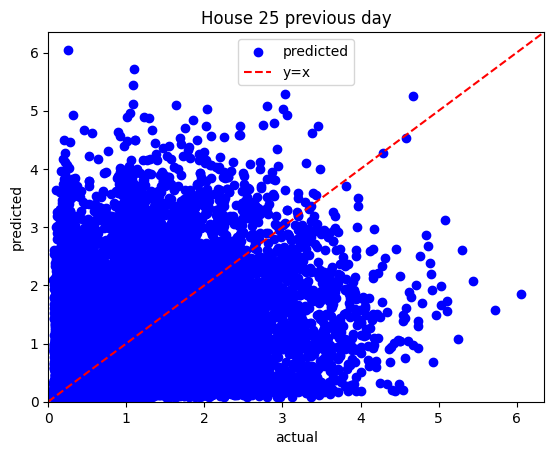


	House 26
MSE: 0.9652
MAE: 0.6496
R2: -0.2396


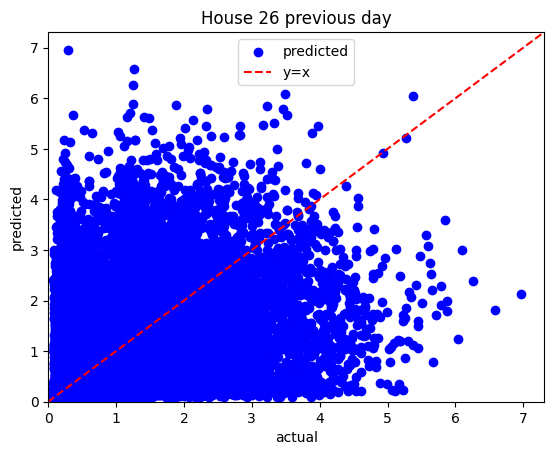


	House 27
MSE: 0.1452
MAE: 0.2158
R2: -0.2772


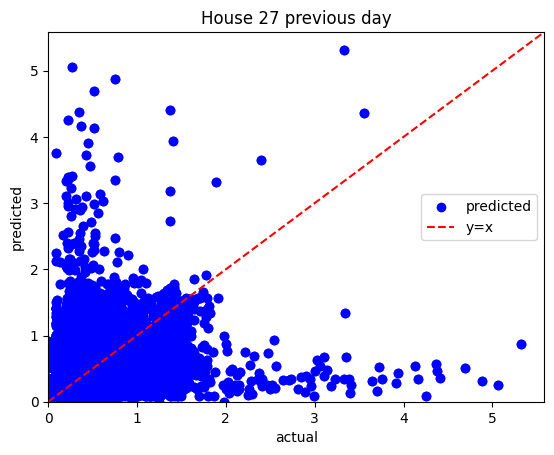


	House 28
MSE: 0.6547
MAE: 0.5362
R2: -0.1685


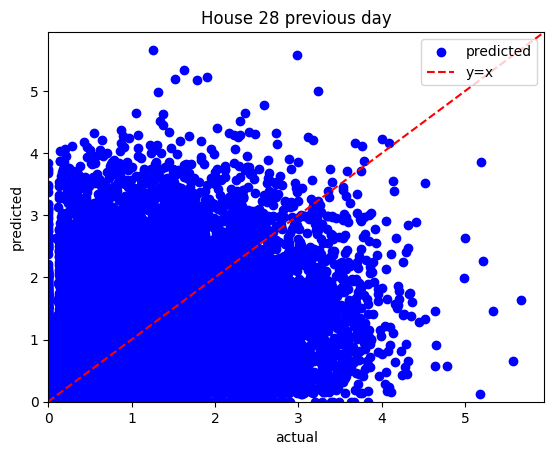


	House 29
MSE: 0.9420
MAE: 0.6432
R2: -0.1685


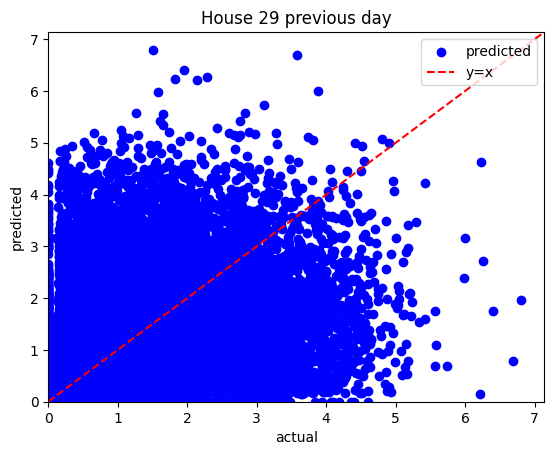


	House 30
MSE: 2.3059
MAE: 1.0040
R2: -0.2396


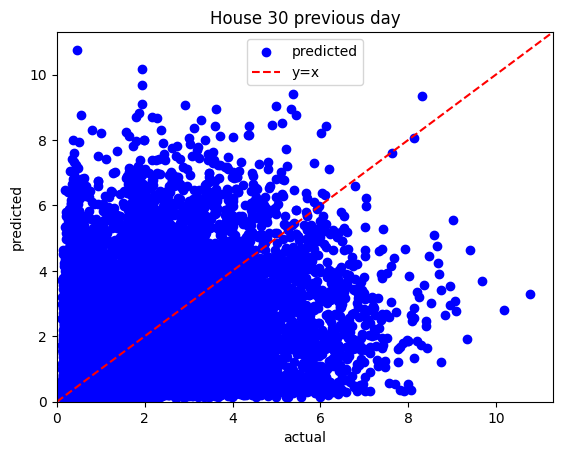


	House 31
MSE: 0.0472
MAE: 0.1230
R2: -0.2772


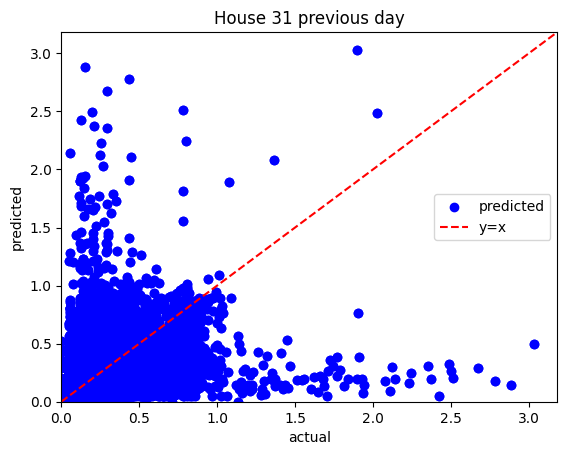


	House 32
MSE: 1.5118
MAE: 0.8148
R2: -0.1685


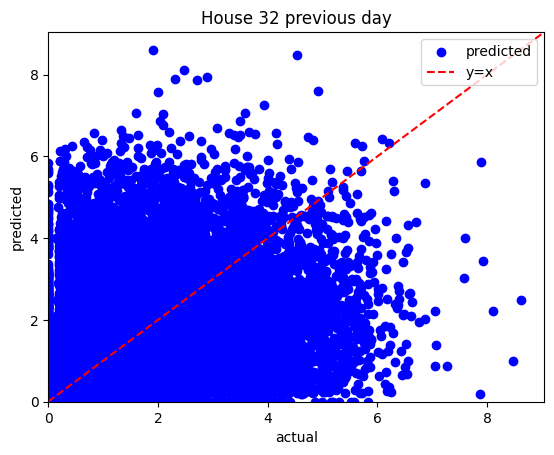


	House 33
MSE: 1.5387
MAE: 0.8202
R2: -0.2396


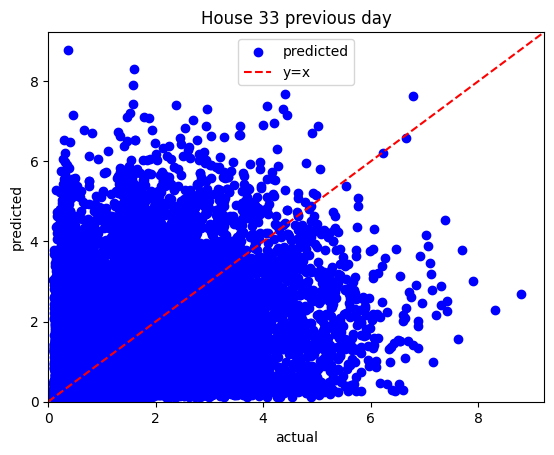


	House 34
MSE: 0.7526
MAE: 0.5736
R2: -0.2396


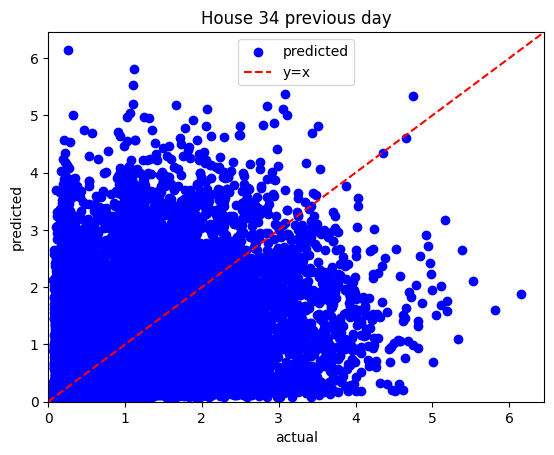


	House 35
MSE: 0.2336
MAE: 0.2737
R2: -0.2772


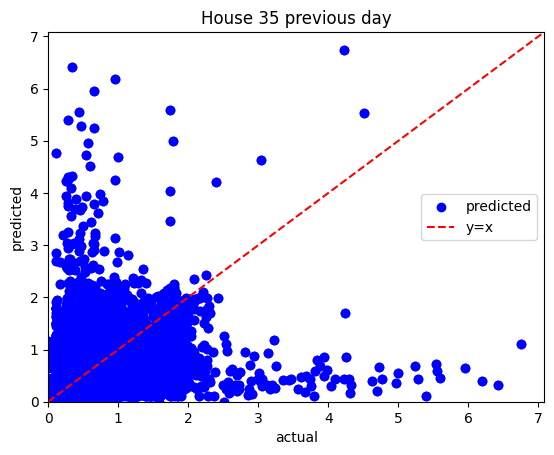


	House 36
MSE: 0.5422
MAE: 0.4170
R2: -0.2772


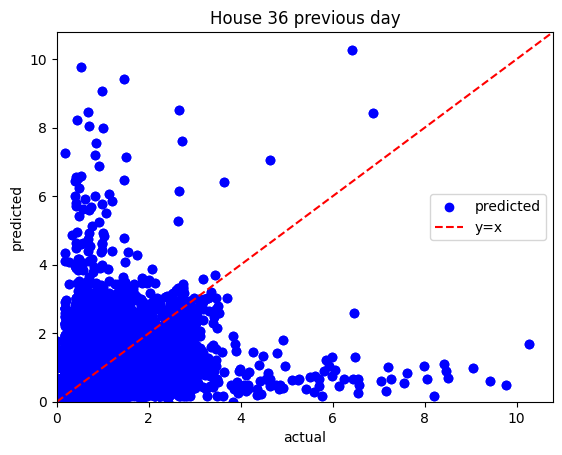


	House 37
MSE: 1.6504
MAE: 0.8494
R2: -0.2396


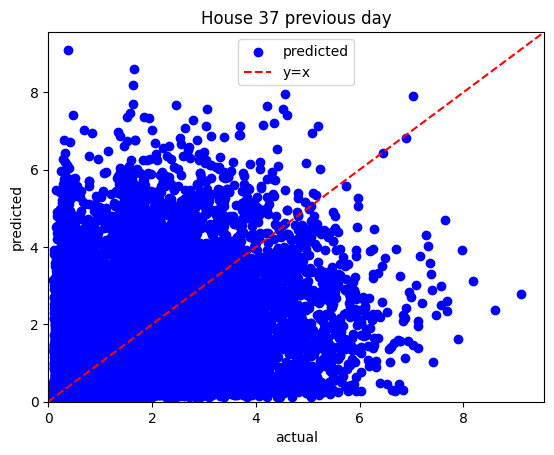


	House 38
MSE: 0.4011
MAE: 0.3586
R2: -0.2772


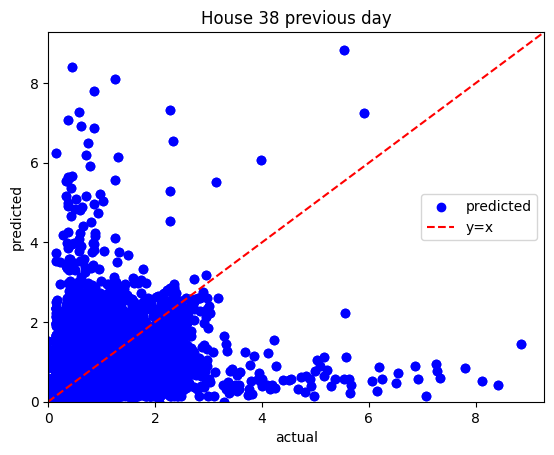


	House 39
MSE: 0.3733
MAE: 0.3460
R2: -0.2772


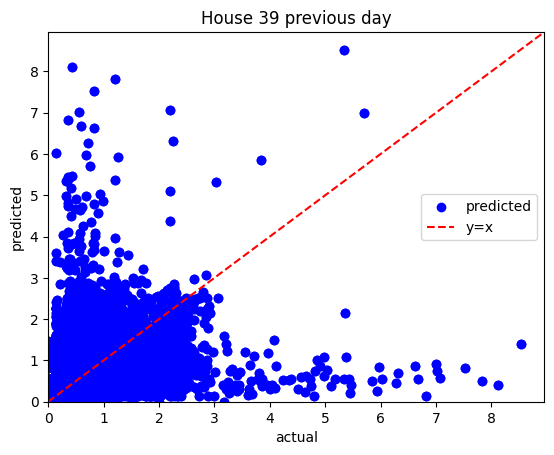


	House 40
MSE: 0.2377
MAE: 0.3231
R2: -0.1685


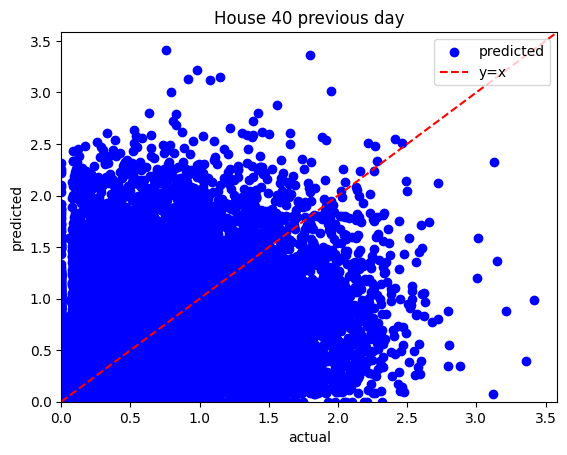


	House 41
MSE: 0.1901
MAE: 0.2883
R2: -0.2396


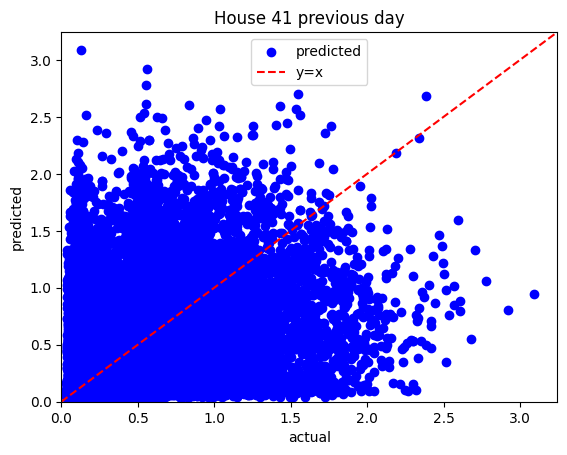


	House 42
MSE: 0.1423
MAE: 0.2500
R2: -0.1685


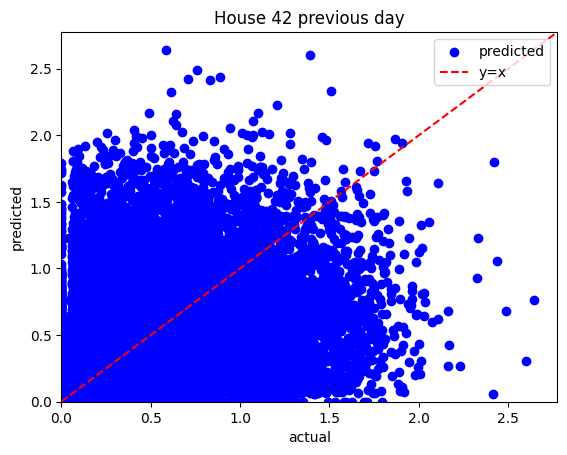


	House 43
MSE: 0.1683
MAE: 0.2718
R2: -0.1685


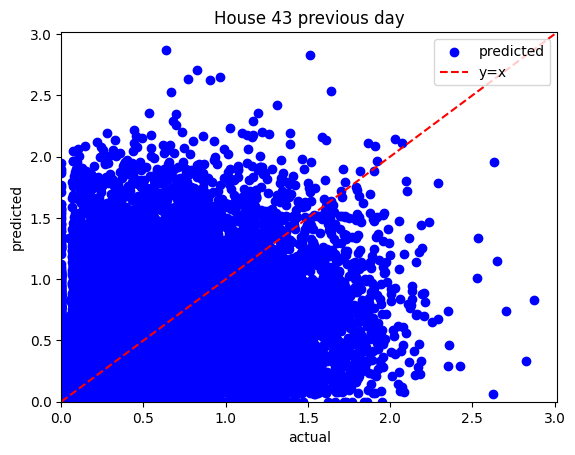


	House 44
MSE: 0.0365
MAE: 0.1082
R2: -0.2772


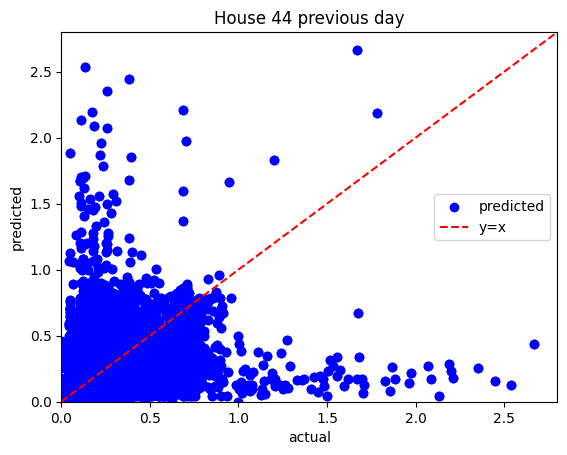


	House 45
MSE: 0.1625
MAE: 0.2665
R2: -0.2396


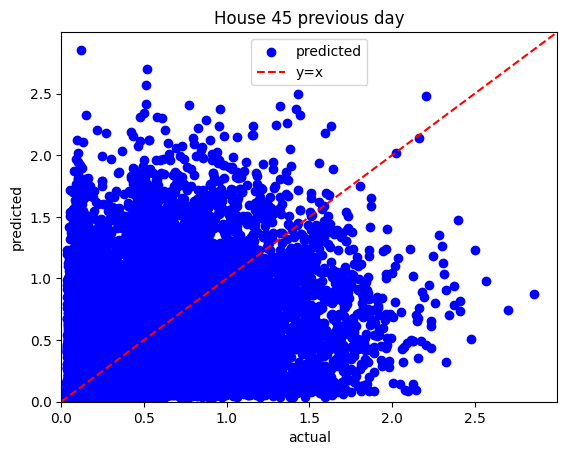


	House 46
MSE: 0.2013
MAE: 0.2967
R2: -0.2396


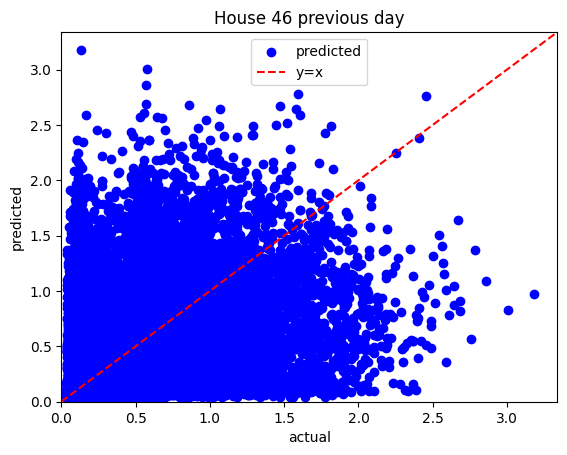


	House 47
MSE: 0.1645
MAE: 0.2688
R2: -0.1685


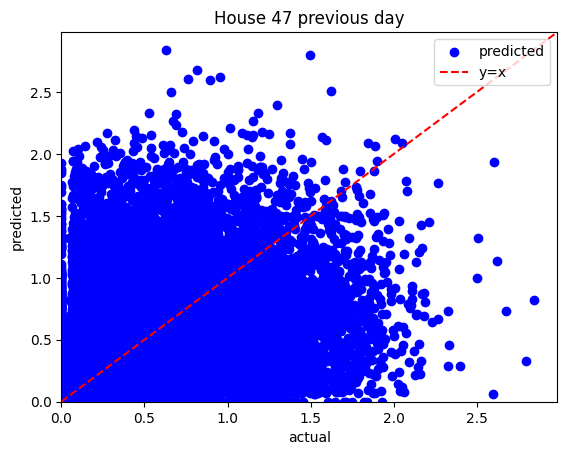


	House 48
MSE: 0.2589
MAE: 0.3372
R2: -0.1685


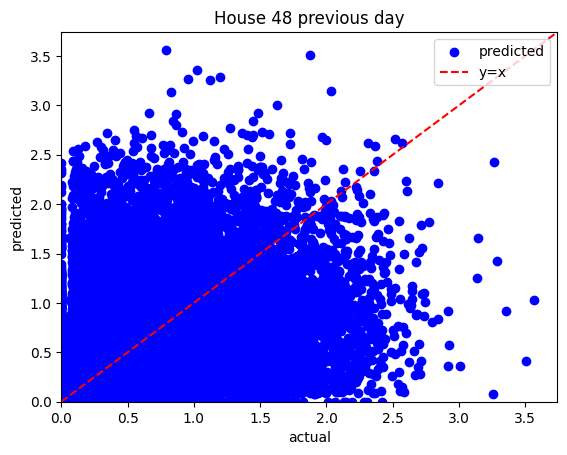


	House 49
MSE: 0.2309
MAE: 0.3177
R2: -0.2396


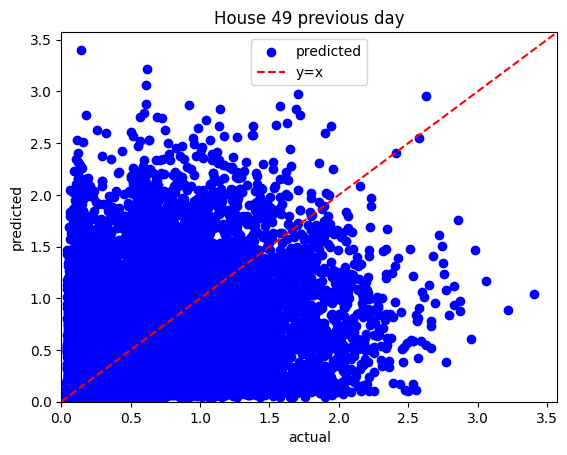


	House 50
MSE: 0.1430
MAE: 0.2500
R2: -0.2396


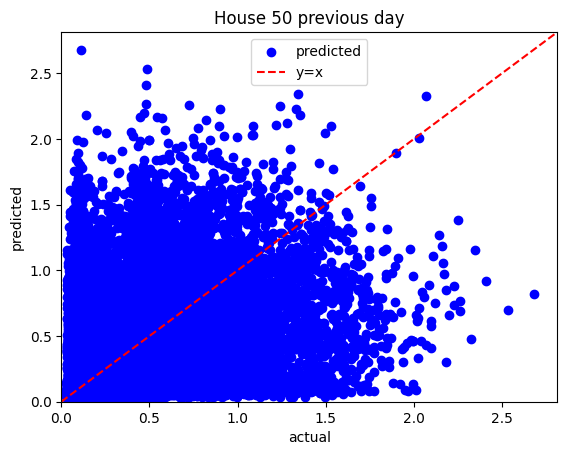

In [60]:
for house in X_previous_day:
    print("\tHouse {}".format(house))
    no_ml_predict(X_previous_day[house], y_previous_day[house])
    plot_results(X_previous_day[house], y_previous_day[house], "House {} previous day".format(house))
    print()

### Previous week same day and same hour

	House 0
MSE: 25.0879
MAE: 1.3346
R2: -0.9158


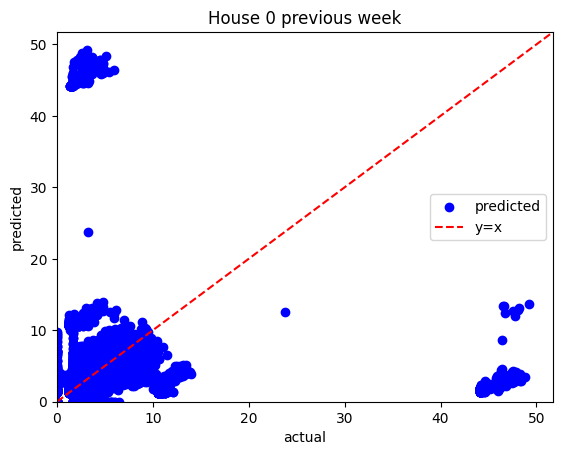


	House 1
MSE: 1.2557
MAE: 0.7375
R2: -0.2477


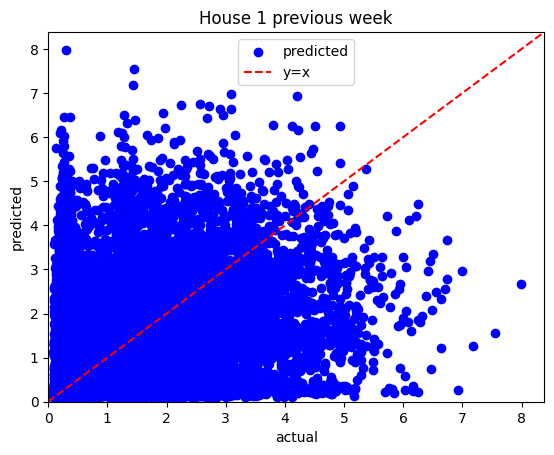


	House 2
MSE: 0.4854
MAE: 0.3465
R2: 0.5373


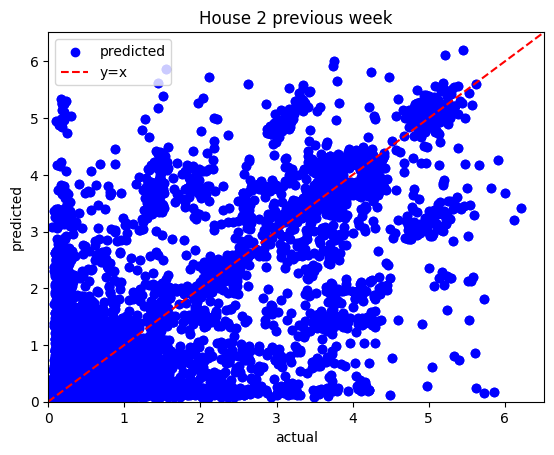


	House 3
MSE: 0.1232
MAE: 0.1746
R2: 0.5373


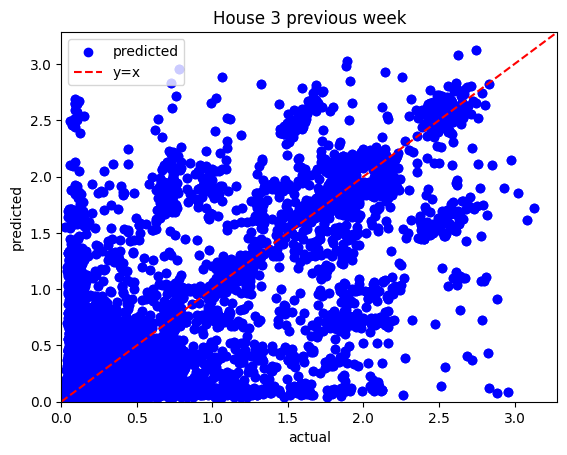


	House 4
MSE: 0.7832
MAE: 0.4401
R2: 0.5373


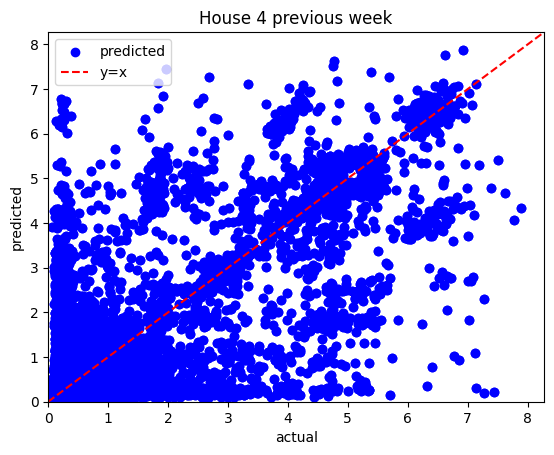


	House 5
MSE: 1.6682
MAE: 0.8501
R2: -0.2477


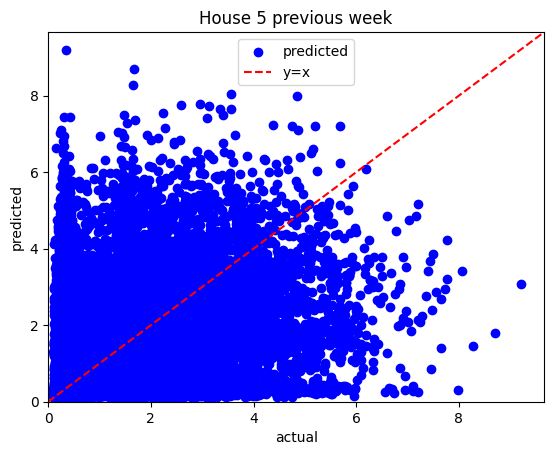


	House 6
MSE: 0.2137
MAE: 0.3104
R2: -0.3064


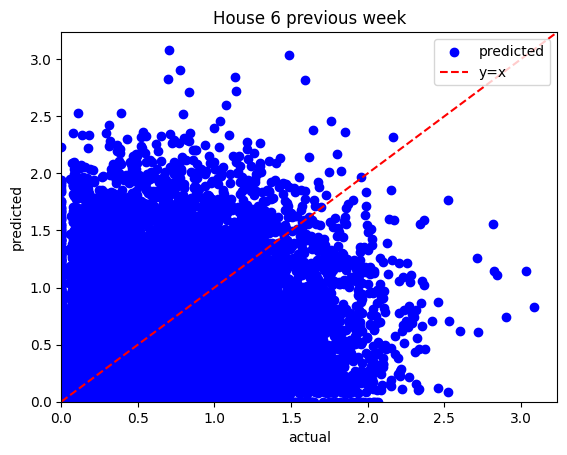


	House 7
MSE: 1.7937
MAE: 0.8992
R2: -0.3064


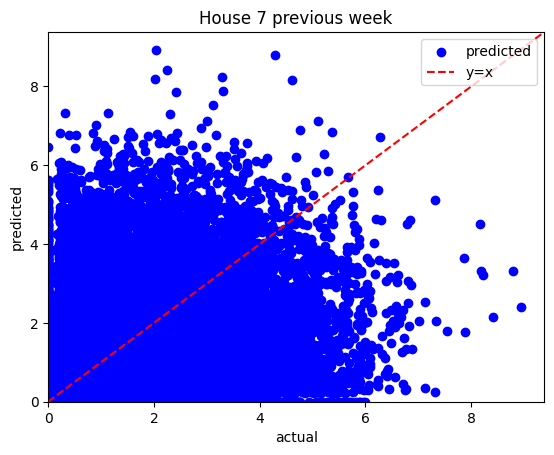


	House 8
MSE: 0.0511
MAE: 0.1332
R2: -0.4440


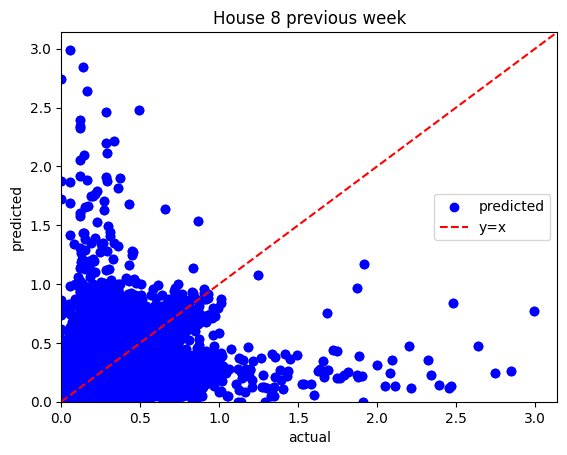


	House 9
MSE: 2.5061
MAE: 1.0628
R2: -0.3064


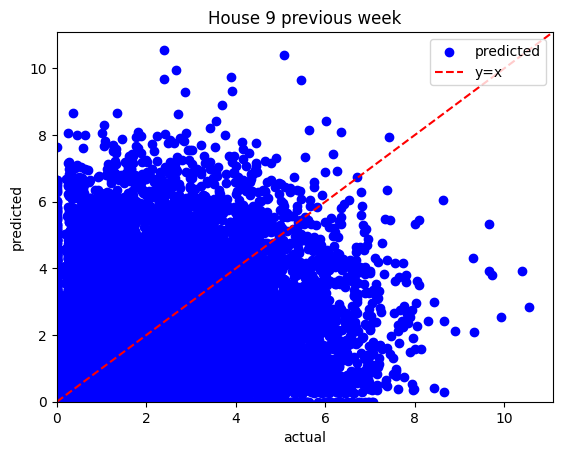


	House 10
MSE: 0.2043
MAE: 0.3035
R2: -0.3064


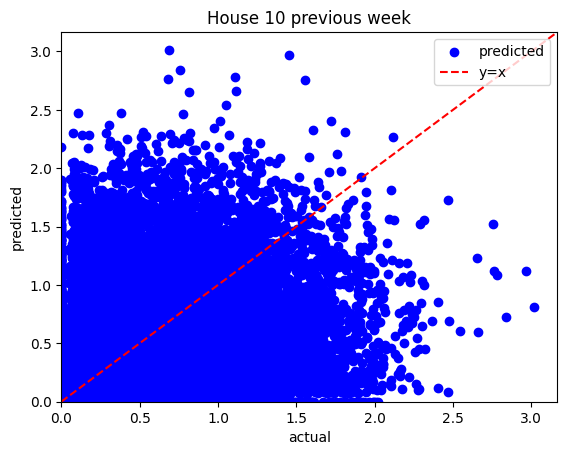


	House 11
MSE: 2.4637
MAE: 1.0538
R2: -0.3064


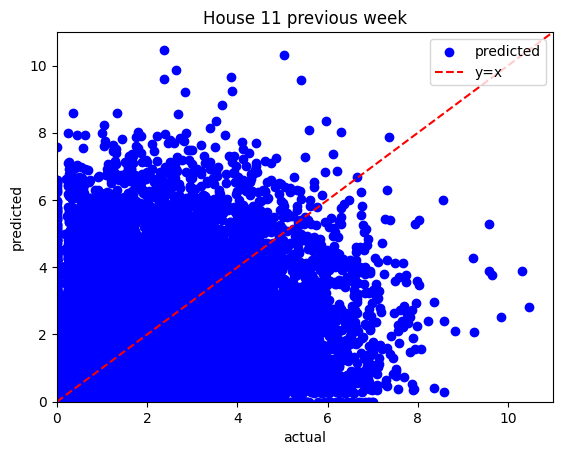


	House 12
MSE: 1.4682
MAE: 0.6025
R2: 0.5373


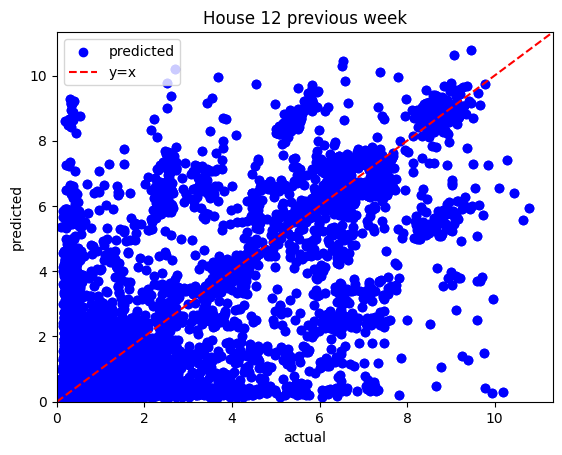


	House 13
MSE: 0.4274
MAE: 0.3852
R2: -0.4440


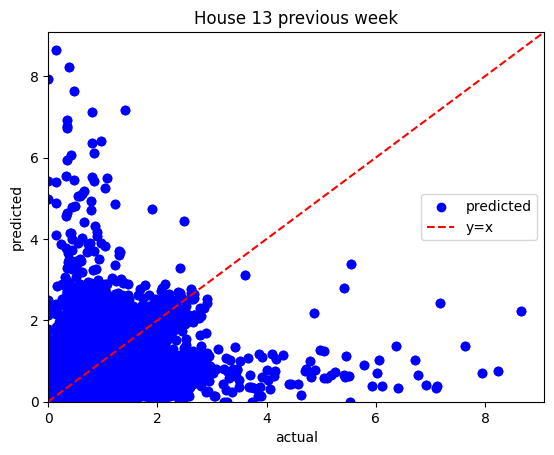


	House 14
MSE: 0.3934
MAE: 0.3119
R2: 0.5373


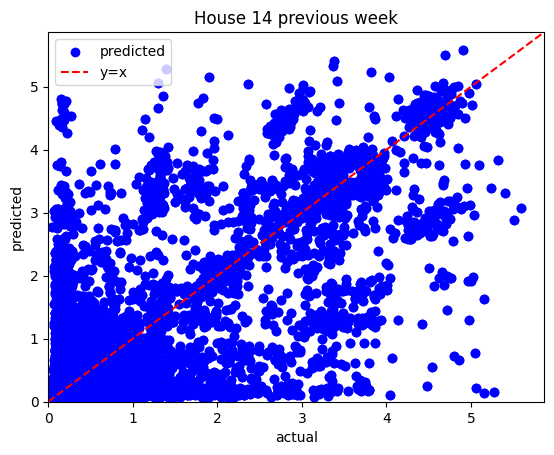


	House 15
MSE: 1.0196
MAE: 0.6646
R2: -0.2477


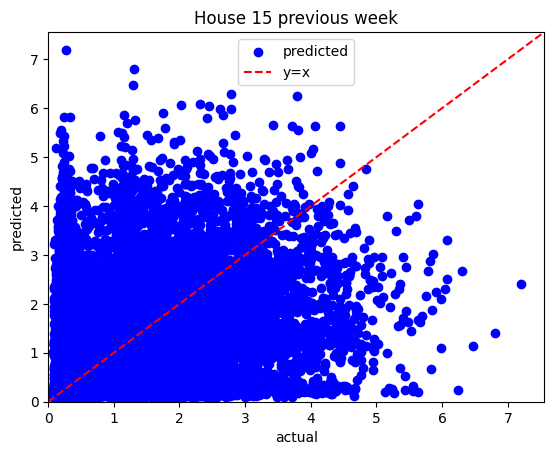


	House 16
MSE: 0.2462
MAE: 0.3331
R2: -0.3064


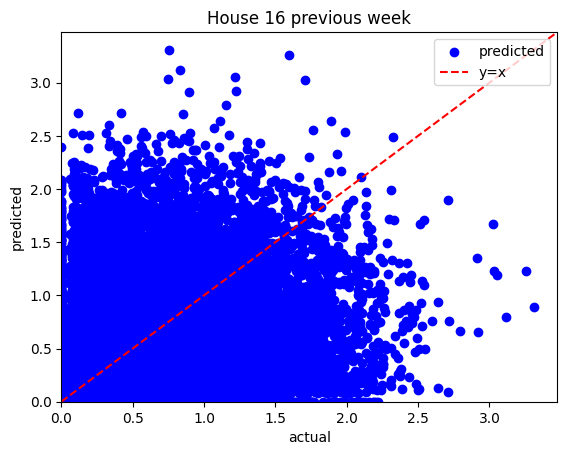


	House 17
MSE: 0.2281
MAE: 0.2814
R2: -0.4440


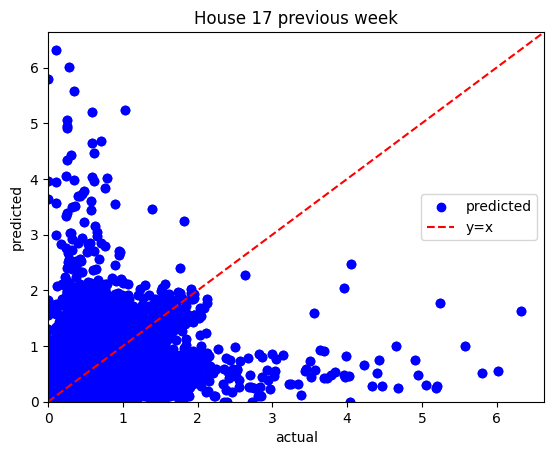


	House 18
MSE: 0.7434
MAE: 0.5675
R2: -0.2477


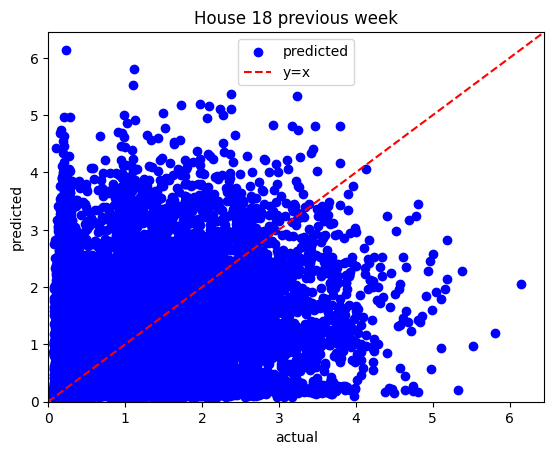


	House 19
MSE: 0.2478
MAE: 0.2933
R2: -0.4440


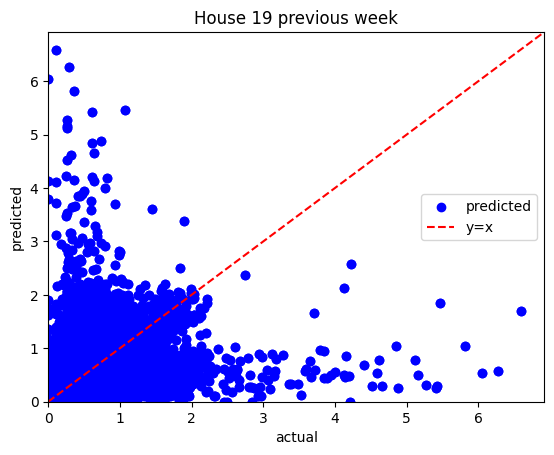


	House 20
MSE: 0.2081
MAE: 0.3063
R2: -0.3064


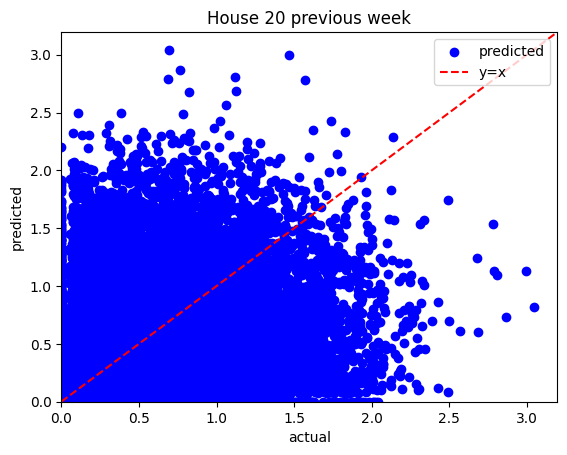


	House 21
MSE: 0.6511
MAE: 0.4755
R2: -0.4440


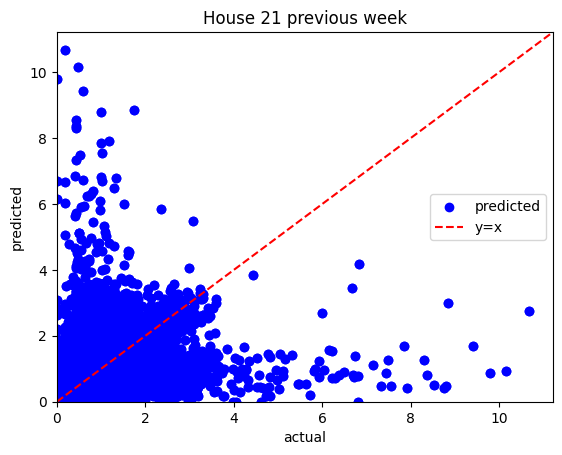


	House 22
MSE: 0.1793
MAE: 0.2843
R2: -0.3064


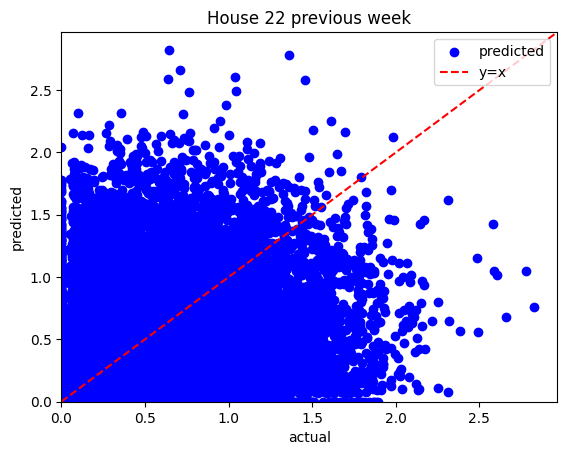


	House 23
MSE: 1.8376
MAE: 0.8922
R2: -0.2477


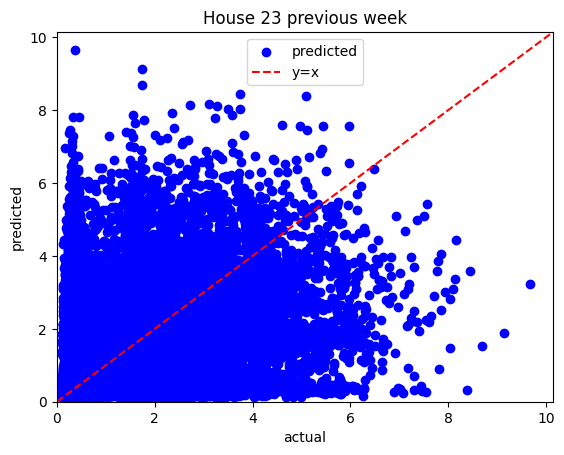


	House 24
MSE: 0.5742
MAE: 0.4465
R2: -0.4440


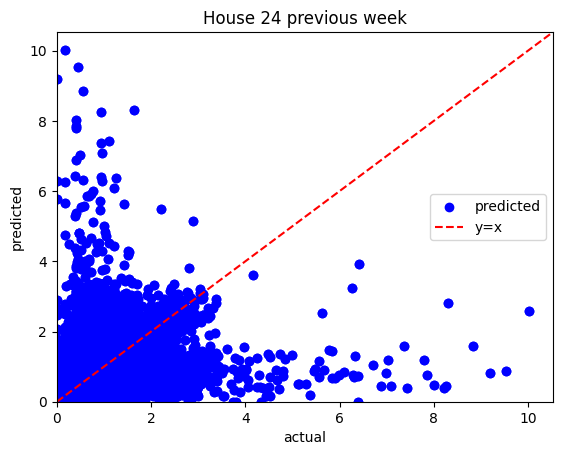


	House 25
MSE: 0.7208
MAE: 0.5588
R2: -0.2477


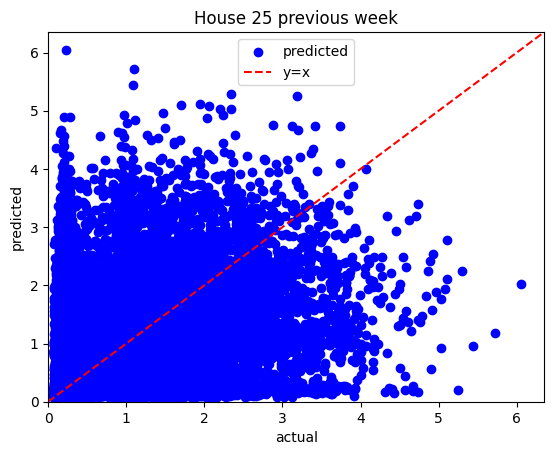


	House 26
MSE: 0.9546
MAE: 0.6430
R2: -0.2477


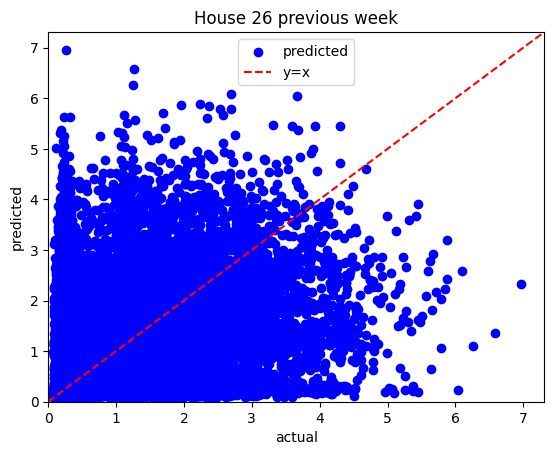


	House 27
MSE: 0.1615
MAE: 0.2368
R2: -0.4440


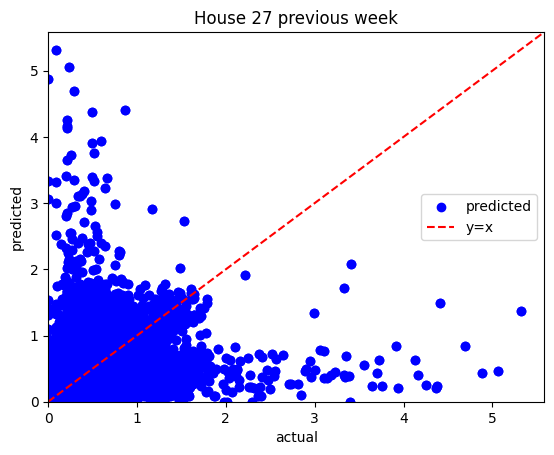


	House 28
MSE: 0.7216
MAE: 0.5703
R2: -0.3064


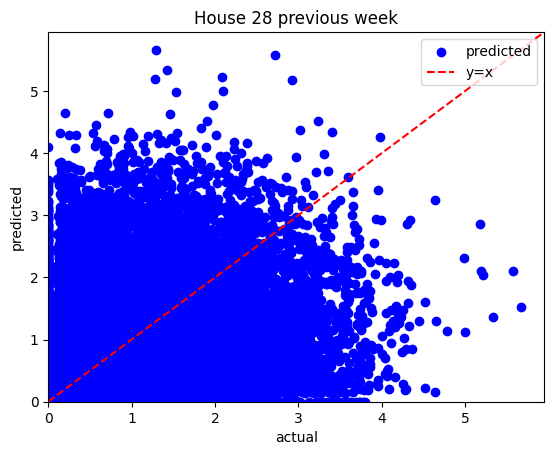


	House 29
MSE: 1.0382
MAE: 0.6841
R2: -0.3064


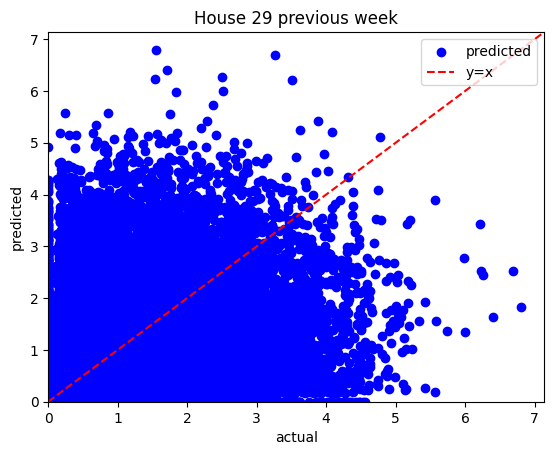


	House 30
MSE: 2.2803
MAE: 0.9939
R2: -0.2477


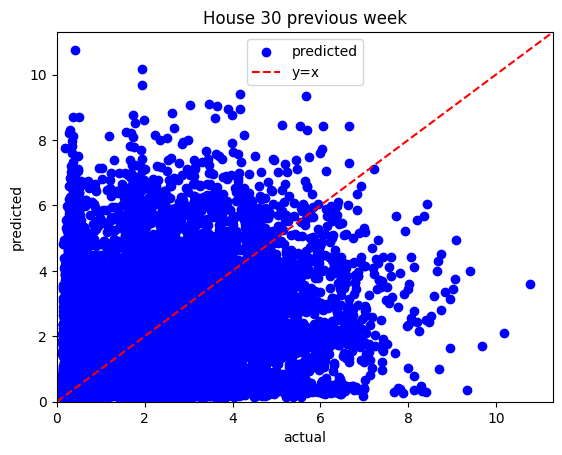


	House 31
MSE: 0.0525
MAE: 0.1350
R2: -0.4440


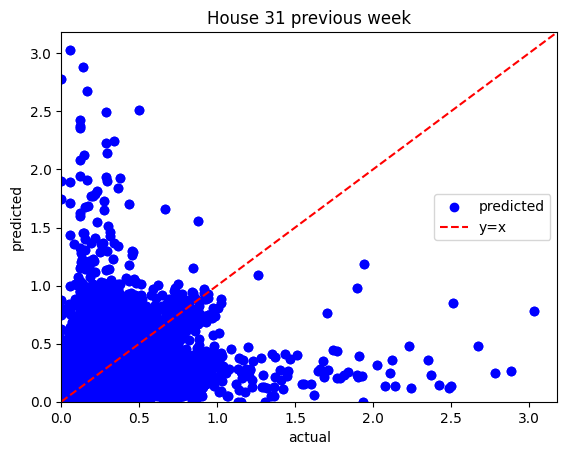


	House 32
MSE: 1.6663
MAE: 0.8667
R2: -0.3064


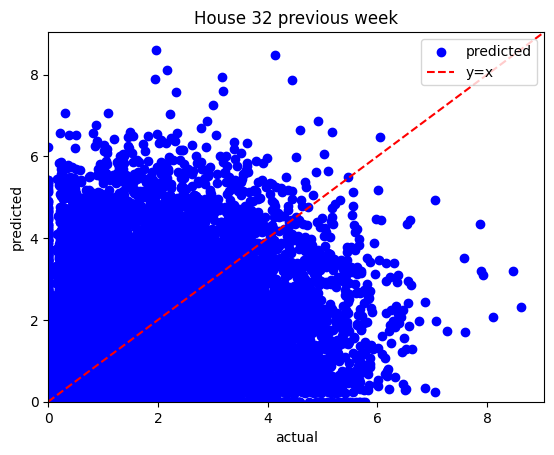


	House 33
MSE: 1.5217
MAE: 0.8119
R2: -0.2477


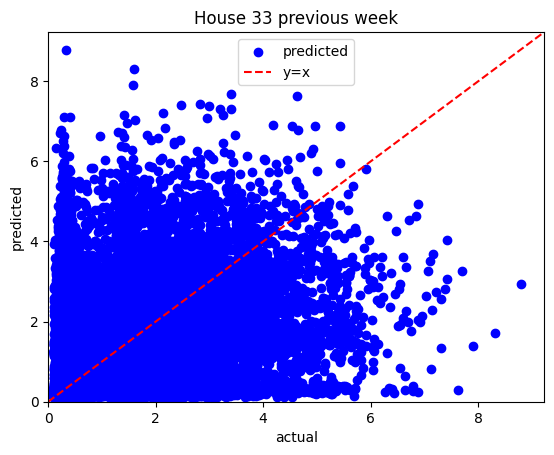


	House 34
MSE: 0.7443
MAE: 0.5678
R2: -0.2477


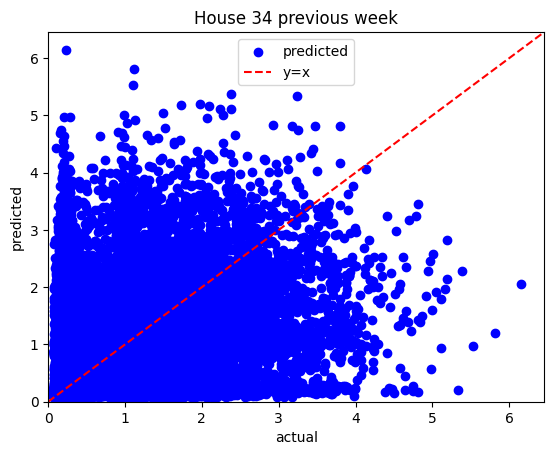


	House 35
MSE: 0.2598
MAE: 0.3003
R2: -0.4440


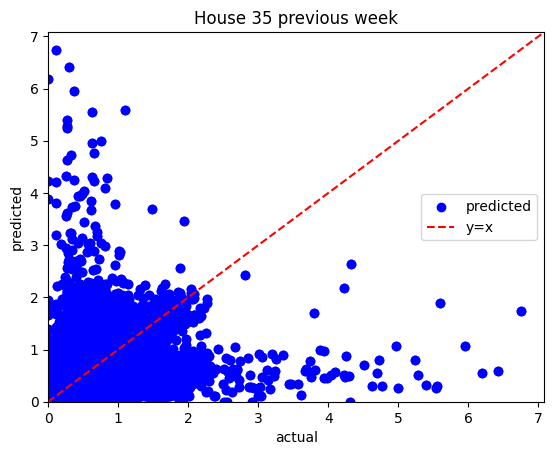


	House 36
MSE: 0.6030
MAE: 0.4576
R2: -0.4440


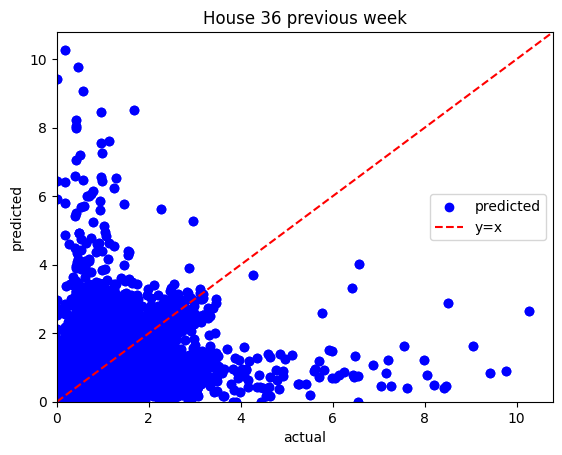


	House 37
MSE: 1.6322
MAE: 0.8408
R2: -0.2477


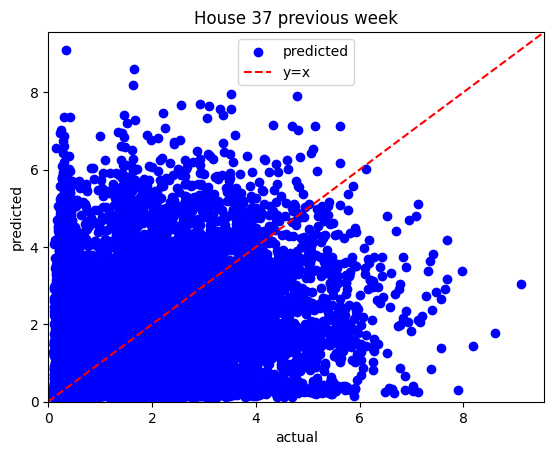


	House 38
MSE: 0.4461
MAE: 0.3936
R2: -0.4440


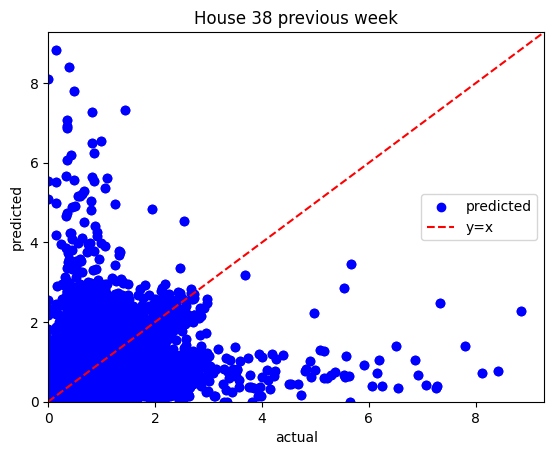


	House 39
MSE: 0.4152
MAE: 0.3797
R2: -0.4440


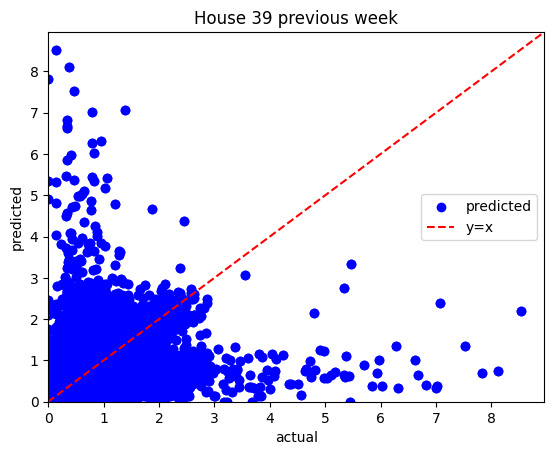


	House 40
MSE: 0.2620
MAE: 0.3437
R2: -0.3064


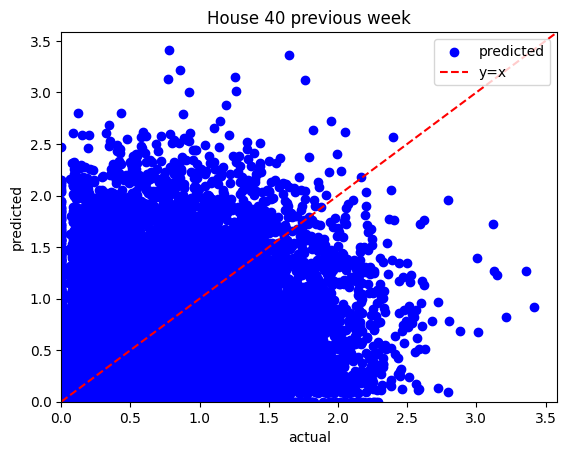


	House 41
MSE: 0.1880
MAE: 0.2854
R2: -0.2477


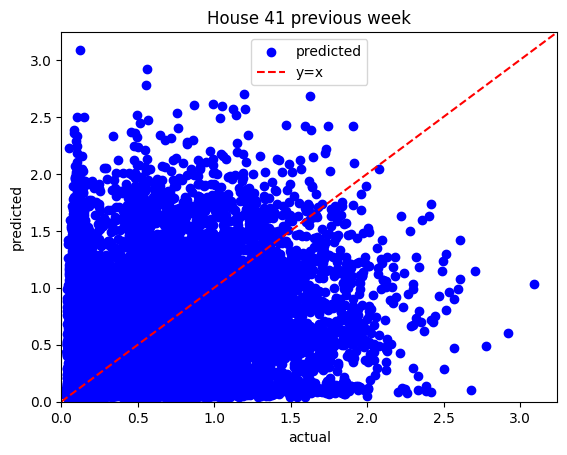


	House 42
MSE: 0.1569
MAE: 0.2659
R2: -0.3064


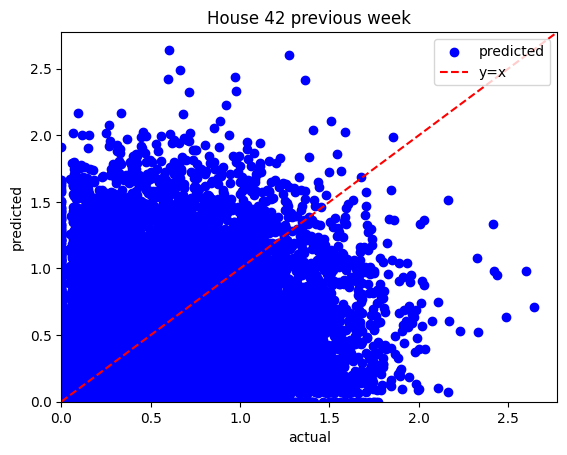


	House 43
MSE: 0.1855
MAE: 0.2891
R2: -0.3064


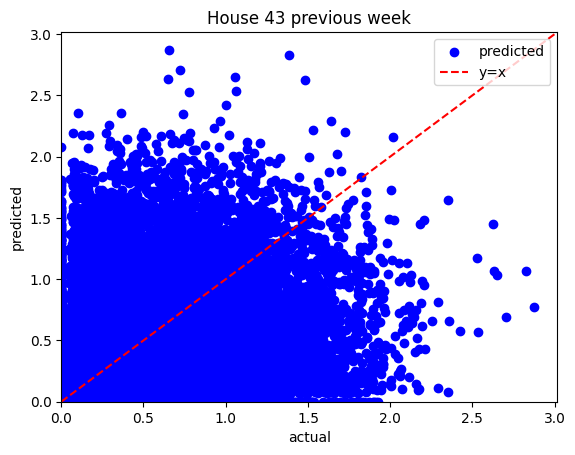


	House 44
MSE: 0.0406
MAE: 0.1187
R2: -0.4440


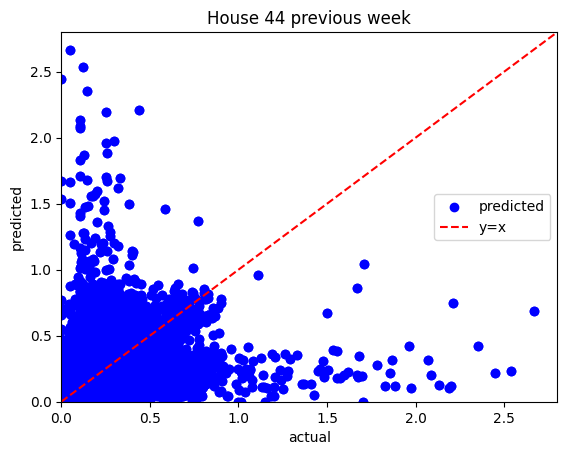


	House 45
MSE: 0.1607
MAE: 0.2638
R2: -0.2477


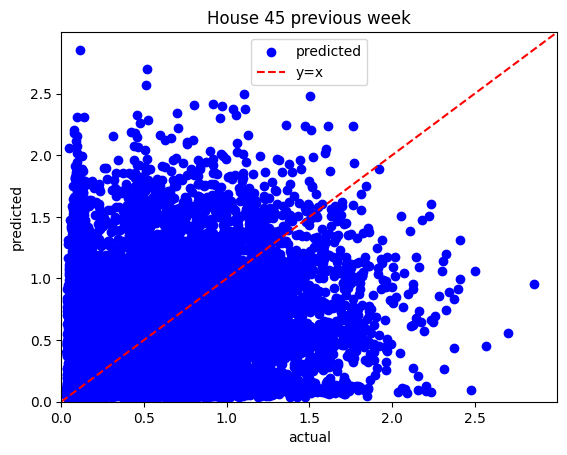


	House 46
MSE: 0.1991
MAE: 0.2937
R2: -0.2477


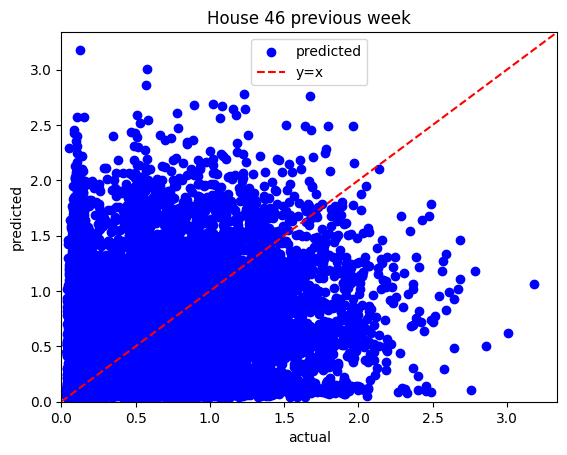


	House 47
MSE: 0.1813
MAE: 0.2859
R2: -0.3064


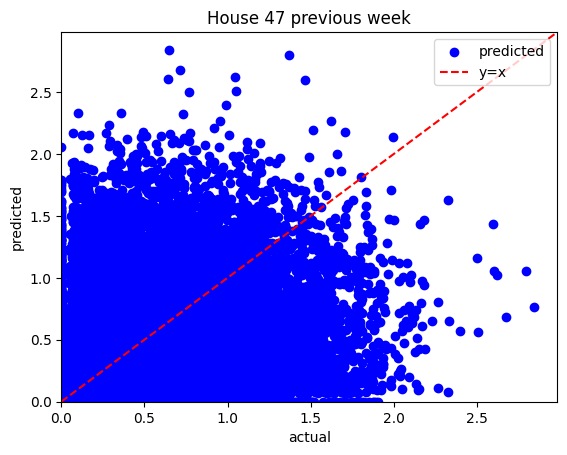


	House 48
MSE: 0.2853
MAE: 0.3586
R2: -0.3064


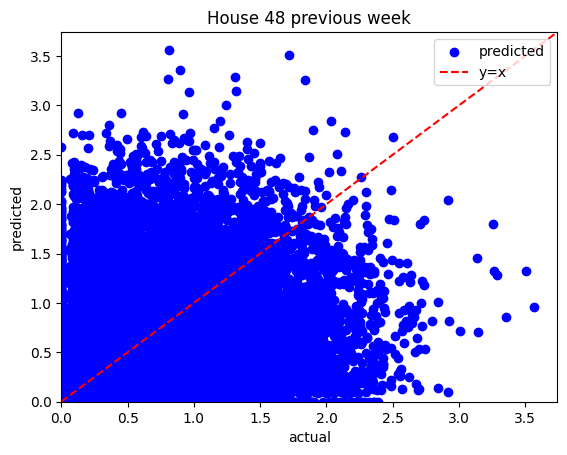


	House 49
MSE: 0.2283
MAE: 0.3145
R2: -0.2477


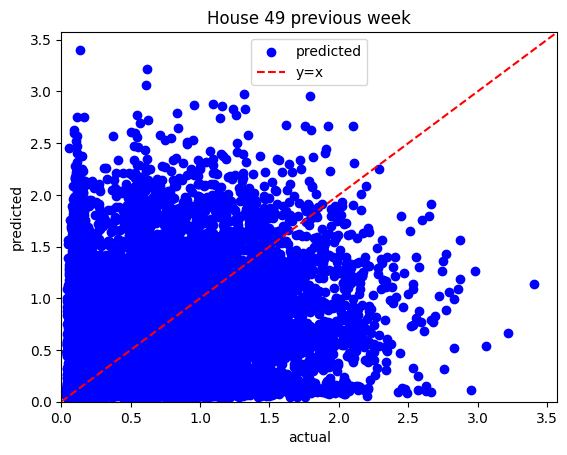


	House 50
MSE: 0.1414
MAE: 0.2475
R2: -0.2477


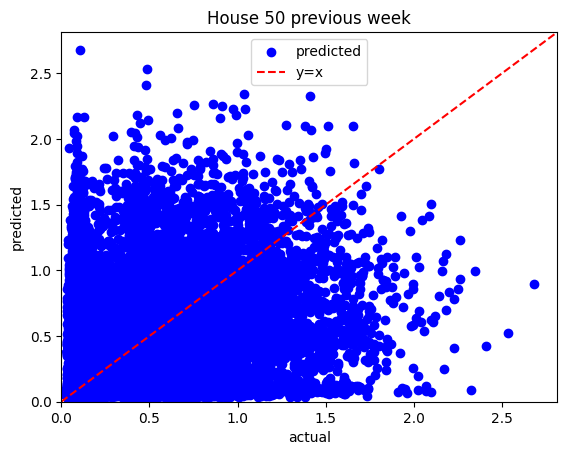

In [61]:
for house in X_previous_week:
    print("\tHouse {}".format(house))
    no_ml_predict(X_previous_week[house], y_previous_week[house])
    plot_results(X_previous_week[house], y_previous_week[house], "House {} previous week".format(house))
    print()

## Prediction (public building)

#### R2 will be negative whenever your model's predictions are worse than a constant function that always predicts the mean of the data.

In [56]:
no_ml_predict(X_last15_public, y_last15_public)

MSE: 0.2680
MAE: 0.3025
R2: 0.9793


In [57]:
no_ml_predict(X_previous_day_public, y_previous_day_public)

MSE: 11.6402
MAE: 0.9341
R2: 0.1004


In [58]:
no_ml_predict(X_last_week_public, y_last_week_public)

MSE: 25.0879
MAE: 1.3346
R2: -0.9158
